In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
import scanpy as sc
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [4]:
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

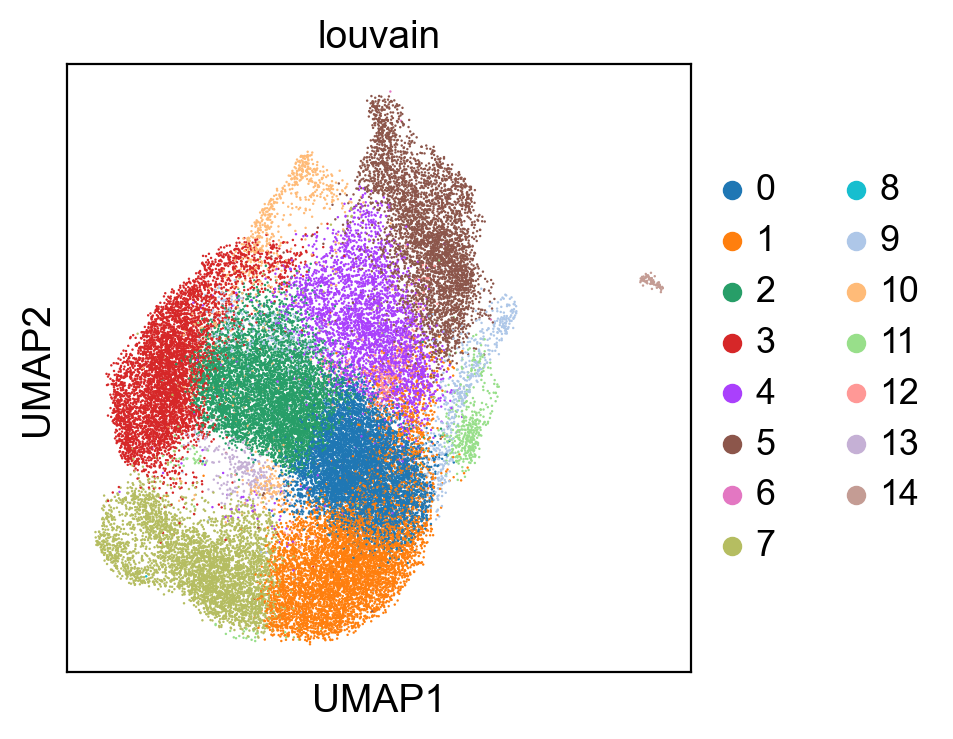

In [5]:
sc.pl.umap(adata, color='louvain')

In [5]:
net = dc.get_dorothea(organism='human', levels=['A','B','C'])
net

source confidence  target    weight
0       ETS1          A   IL12B  1.000000
1       RELA          A     IL6  1.000000
2       MITF          A  BCL2A1 -1.000000
3       E2F1          A  TRERF1  1.000000
4       MITF          A    BCL2  1.000000
...      ...        ...     ...       ...
32272  IKZF1          C   PTK2B  0.333333
32273  IKZF1          C   PRKCB  0.333333
32274  IKZF1          C   PREX1  0.333333
32275   IRF4          C  SLAMF7  0.333333
32276  ZNF83          C  ZNF331  0.333333

[32277 rows x 4 columns]

In [9]:
type(net)

pandas.core.frame.DataFrame

In [10]:
net.to_csv('net.csv')

In [7]:
dc.run_mlm(mat=adata, net=net, source='source', target='target', weight='weight', verbose=True)


  0%|          | 0/4 [00:00<?, ?it/s]

Running mlm on mat with 38677 samples and 1246 targets for 193 sources.


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


In [8]:
adata.obsm['mlm_estimate']

AHR        AR      ARNT      ATF1      ATF2  \
TCGCTTGTCCAGTTCC-1-12 -0.736763  0.110982  0.331540  1.835443  0.850514   
TTGGGATGTTTGTGGT-1-2  -0.380596  0.814610 -0.262122  1.021414  0.825175   
TTGCTGCGTCCAGAAG-1-5  -1.040608 -1.031871  0.372277  0.755334  1.937320   
CCTCTAGCAACCCGCA-1-0  -0.950454 -1.010268  0.168431 -0.523395  1.099777   
GAGGGATGTACTAGCT-1-11 -0.963468  0.785278  0.186588  1.291969  1.548516   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3  -0.387162 -1.446294  0.004918  0.501521  1.590250   
GTCACTCTCTATGTGG-1-0  -1.292183 -0.294351  0.674597  0.912248  0.268279   
ATTGGGTAGGCCTGAA-1-3  -1.061468 -0.460735  0.551831  0.120243  1.110852   
CCTTCAGGTTCCTAGA-1-12 -1.293530 -0.407544  0.292208  1.269915  0.319760   
GGTAATCGTTCGAACT-1-6  -1.036927 -0.897374  0.582147  1.645398  1.075966   

                           ATF3      ATF4      ATF6     BACH1     BACH2  ...  \
TCGCTTGTCCAGTTCC-1-12 -0.893807 -0.802107 -0.022454 -1.009330  1.185269  ...   
TTGGGATGTTTGTGGT-1-2  -0.513643 -1.150339  2.944789 -0.461268  1.553007  ...   
TTGCTGCGTCCAGAAG-1-5  -1.198446 -0.847993  2.573802 -1.368577  0.789595  ...   
CCTCTAGCAACCCGCA-1-0  -0.546215  0.453705  3.463343 -1.059251  0.558274  ...   
GAGGGATGTACTAGCT-1-11 -0.370667 -0.008515  2.652052  0.007558  0.481167  ...   
...                         ...       ...       ...       ...       ...  ...   
CAATTTCAGTCGAAAT-1-3  -0.049124 -1.397390  0.282392 -0.684076  0.673949  ...   
GTCACTCTCTATGTGG-1-0  -1.010525 -0.960843  4.525792 -0.765057  0.024338  ...   
ATTGGGTAGGCCTGAA-1-3  -2.438320 -1.025396  3.384354 -0.850767  1.280439  ...   
CCTTCAGGTTCCTAGA-1-12 -0.295338 -0.487267  4.818632  0.118639  0.247381  ...   
GGTAATCGTTCGAACT-1-6  -0.380641 -0.726094  1.884310  0.391145 -0.200039  ...   

                            VDR       WT1       YY1    ZBTB33    ZBTB7A  \
TCGCTTGTCCAGTTCC-1-12  2.697524  1.535512 -0.643065  1.876647  0.368832   
TTGGGATGTTTGTGGT-1-2   2.785379  0.836828  0.691292  2.101459 -0.117392   
TTGCTGCGTCCAGAAG-1-5   2.862326  0.015280 -0.448035  2.893718 -0.626217   
CCTCTAGCAACCCGCA-1-0   2.674715  1.308887  0.130388  1.484859  0.001373   
GAGGGATGTACTAGCT-1-11  3.369871  1.039583 -0.779091  1.873165 -0.315783   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3   2.391294  1.534938 -1.380985  1.496470 -0.606861   
GTCACTCTCTATGTGG-1-0   2.340390  1.031349 -0.969671  1.471996  0.415353   
ATTGGGTAGGCCTGAA-1-3   2.788203  1.511531  0.340717  2.650945 -0.376512   
CCTTCAGGTTCCTAGA-1-12  2.525517  1.387425  0.742040  2.539429  0.162934   
GGTAATCGTTCGAACT-1-6   3.071440  1.126539 -0.831499  1.519309 -0.098260   

                           ZEB1      ZEB2    ZNF143    ZNF263    ZNF384  
TCGCTTGTCCAGTTCC-1-12  0.225446  0.485492  0.472414  0.341778  0.079223  
TTGGGATGTTTGTGGT-1-2  -0.271484  1.227852  0.369912  0.965490  3.072759  
TTGCTGCGTCCAGAAG-1-5  -0.263281  0.344804  0.539218  1.232525  1.337816  
CCTCTAGCAACCCGCA-1-0  -1.216199  0.096655 -0.067699  0.717398  0.715457  
GAGGGATGTACTAGCT-1-11 -0.129248  0.841411 -0.566766  1.104512 -0.560210  
...                         ...       ...       ...       ...       ...  
CAATTTCAGTCGAAAT-1-3  -0.268535  1.850636  0.299105  0.581847  0.438597  
GTCACTCTCTATGTGG-1-0   0.239157  1.687102  0.754658  0.874345  2.682374  
ATTGGGTAGGCCTGAA-1-3   0.110897  0.091617 -0.497788  0.683114  0.454322  
CCTTCAGGTTCCTAGA-1-12 -0.156090  0.265657  0.245958  1.655300  1.614860  
GGTAATCGTTCGAACT-1-6   0.545439  0.957273 -0.030931  1.083553  1.159378  

[38677 rows x 193 columns]

In [9]:
adata.obsm['dorothea_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['dorothea_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [10]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 38677 × 193
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSCR

In [15]:
tfs=adata.obsm['mlm_estimate'].columns
for tf in tfs:
    adata.obs['.'+tf]=adata.obsm['dorothea_mlm_estimate'][tf]


In [16]:
x=perturb.pp.obs_mean_with_sig(adata,
                    obs_list=['.'+tf for tf in tfs],
                    ref='control',
                   grouping_variable='gene.compact')

.AHR
.AR
.ARNT
.ATF1
.ATF2
.ATF3
.ATF4
.ATF6
.BACH1
.BACH2
.BATF
.BCL6
.BHLHE40
.CDX2
.CEBPA
.CEBPB
.CEBPD
.CEBPG
.CREB1
.CREM
.CTCF
.CUX1
.E2F1
.E2F2
.E2F3
.E2F4
.E2F5
.E2F6
.E2F7
.EBF1
.EGR1
.ELF1
.ELF3
.ELK1
.ELK4
.EPAS1
.ERG
.ESR1
.ESR2
.ESRRA
.ETS1
.ETS2
.ETV4
.FLI1
.FOS
.FOSL1
.FOSL2
.FOXA1
.FOXA2
.FOXJ2
.FOXK2
.FOXL2
.FOXM1
.FOXO1
.FOXO3
.FOXO4
.FOXP1
.FOXP2
.GABPA
.GATA1
.GATA2
.GATA3
.GATA6
.GFI1B
.GRHL2
.HBP1
.HIF1A
.HNF4A
.HNF4G
.HSF1
.IKZF1
.IRF1
.IRF2
.IRF4
.IRF9
.JUN
.JUNB
.JUND
.KLF1
.KLF4
.KLF5
.KLF6
.KLF9
.LEF1
.LYL1
.MAF
.MAFB
.MAFF
.MAFG
.MAFK
.MAX
.MEF2A
.MEF2B
.MEF2C
.MEIS1
.MEIS2
.MITF
.MNT
.MXI1
.MYB
.MYBL2
.MYC
.MYCN
.NCOA3
.NFATC1
.NFE2
.NFE2L2
.NFIC
.NFKB1
.NFKB2
.NFYA
.NFYB
.NR2F2
.NR3C1
.NR4A1
.NRF1
.ONECUT1
.PAX5
.PAX6
.PBX3
.PDX1
.PGR
.POU2F1
.POU2F2
.POU5F1
.PPARA
.PPARG
.PRDM1
.PRDM14
.RARA
.RBPJ
.REL
.RELA
.RELB
.REST
.RFX5
.RUNX1
.RUNX2
.RUNX3
.RXRA
.SMAD1
.SMAD3
.SMAD4
.SNAI2
.SOX10
.SOX13
.SOX2
.SOX9
.SP1
.SP3
.SPI1
.SPIB
.SREBF1
.SREBF2
.SRF
.STAT1


In [17]:
genes=['ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18', 'SMARCD1', 'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B', 'SMARCB1', 'SMARCD2', 'ARID1B',
       'PBRM1', 'BCL7A', 'ACTL6A', 'SMARCE1', 'ARID1A', 'BRD9', 'BRD7', 
       'SMARCA4', 'PHF10', 'SMARCC1']
len(genes)
genes=['ARID1A','SMARCB1','SMARCE1','SMARCC1','SMARCD2','SMARCA4','BRD9','SMARCD1',
       'ACTL6A',
       'ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18',  'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B',  'ARID1B',
       'PBRM1', 'BCL7A',   'BRD7', 
       'PHF10', 
      ]


In [24]:
x[0].to_csv(FIGS+'single.TFeffect.mean.csv')
x[1].to_csv(FIGS+'single.TFeffect.p.csv')
ps=1e-20

slogp=np.multiply(np.sign(x[0]),-np.log10(x[1]+ps))
slogp.to_csv(FIGS+'single.TFeffect.slog10p.csv')

Index(['.AR', '.USF1', '.E2F5', '.TEAD4', '.STAT5A', '.USF2', '.SNAI2',
       '.ELK4', '.TFAP2C', '.ZBTB7A',
       ...
       '.THAP11', '.BHLHE40', '.STAT2', '.LEF1', '.ATF6', '.HBP1', '.MYC',
       '.E2F4', '.MYCN', '.NR2F2'],
      dtype='object', length=193)


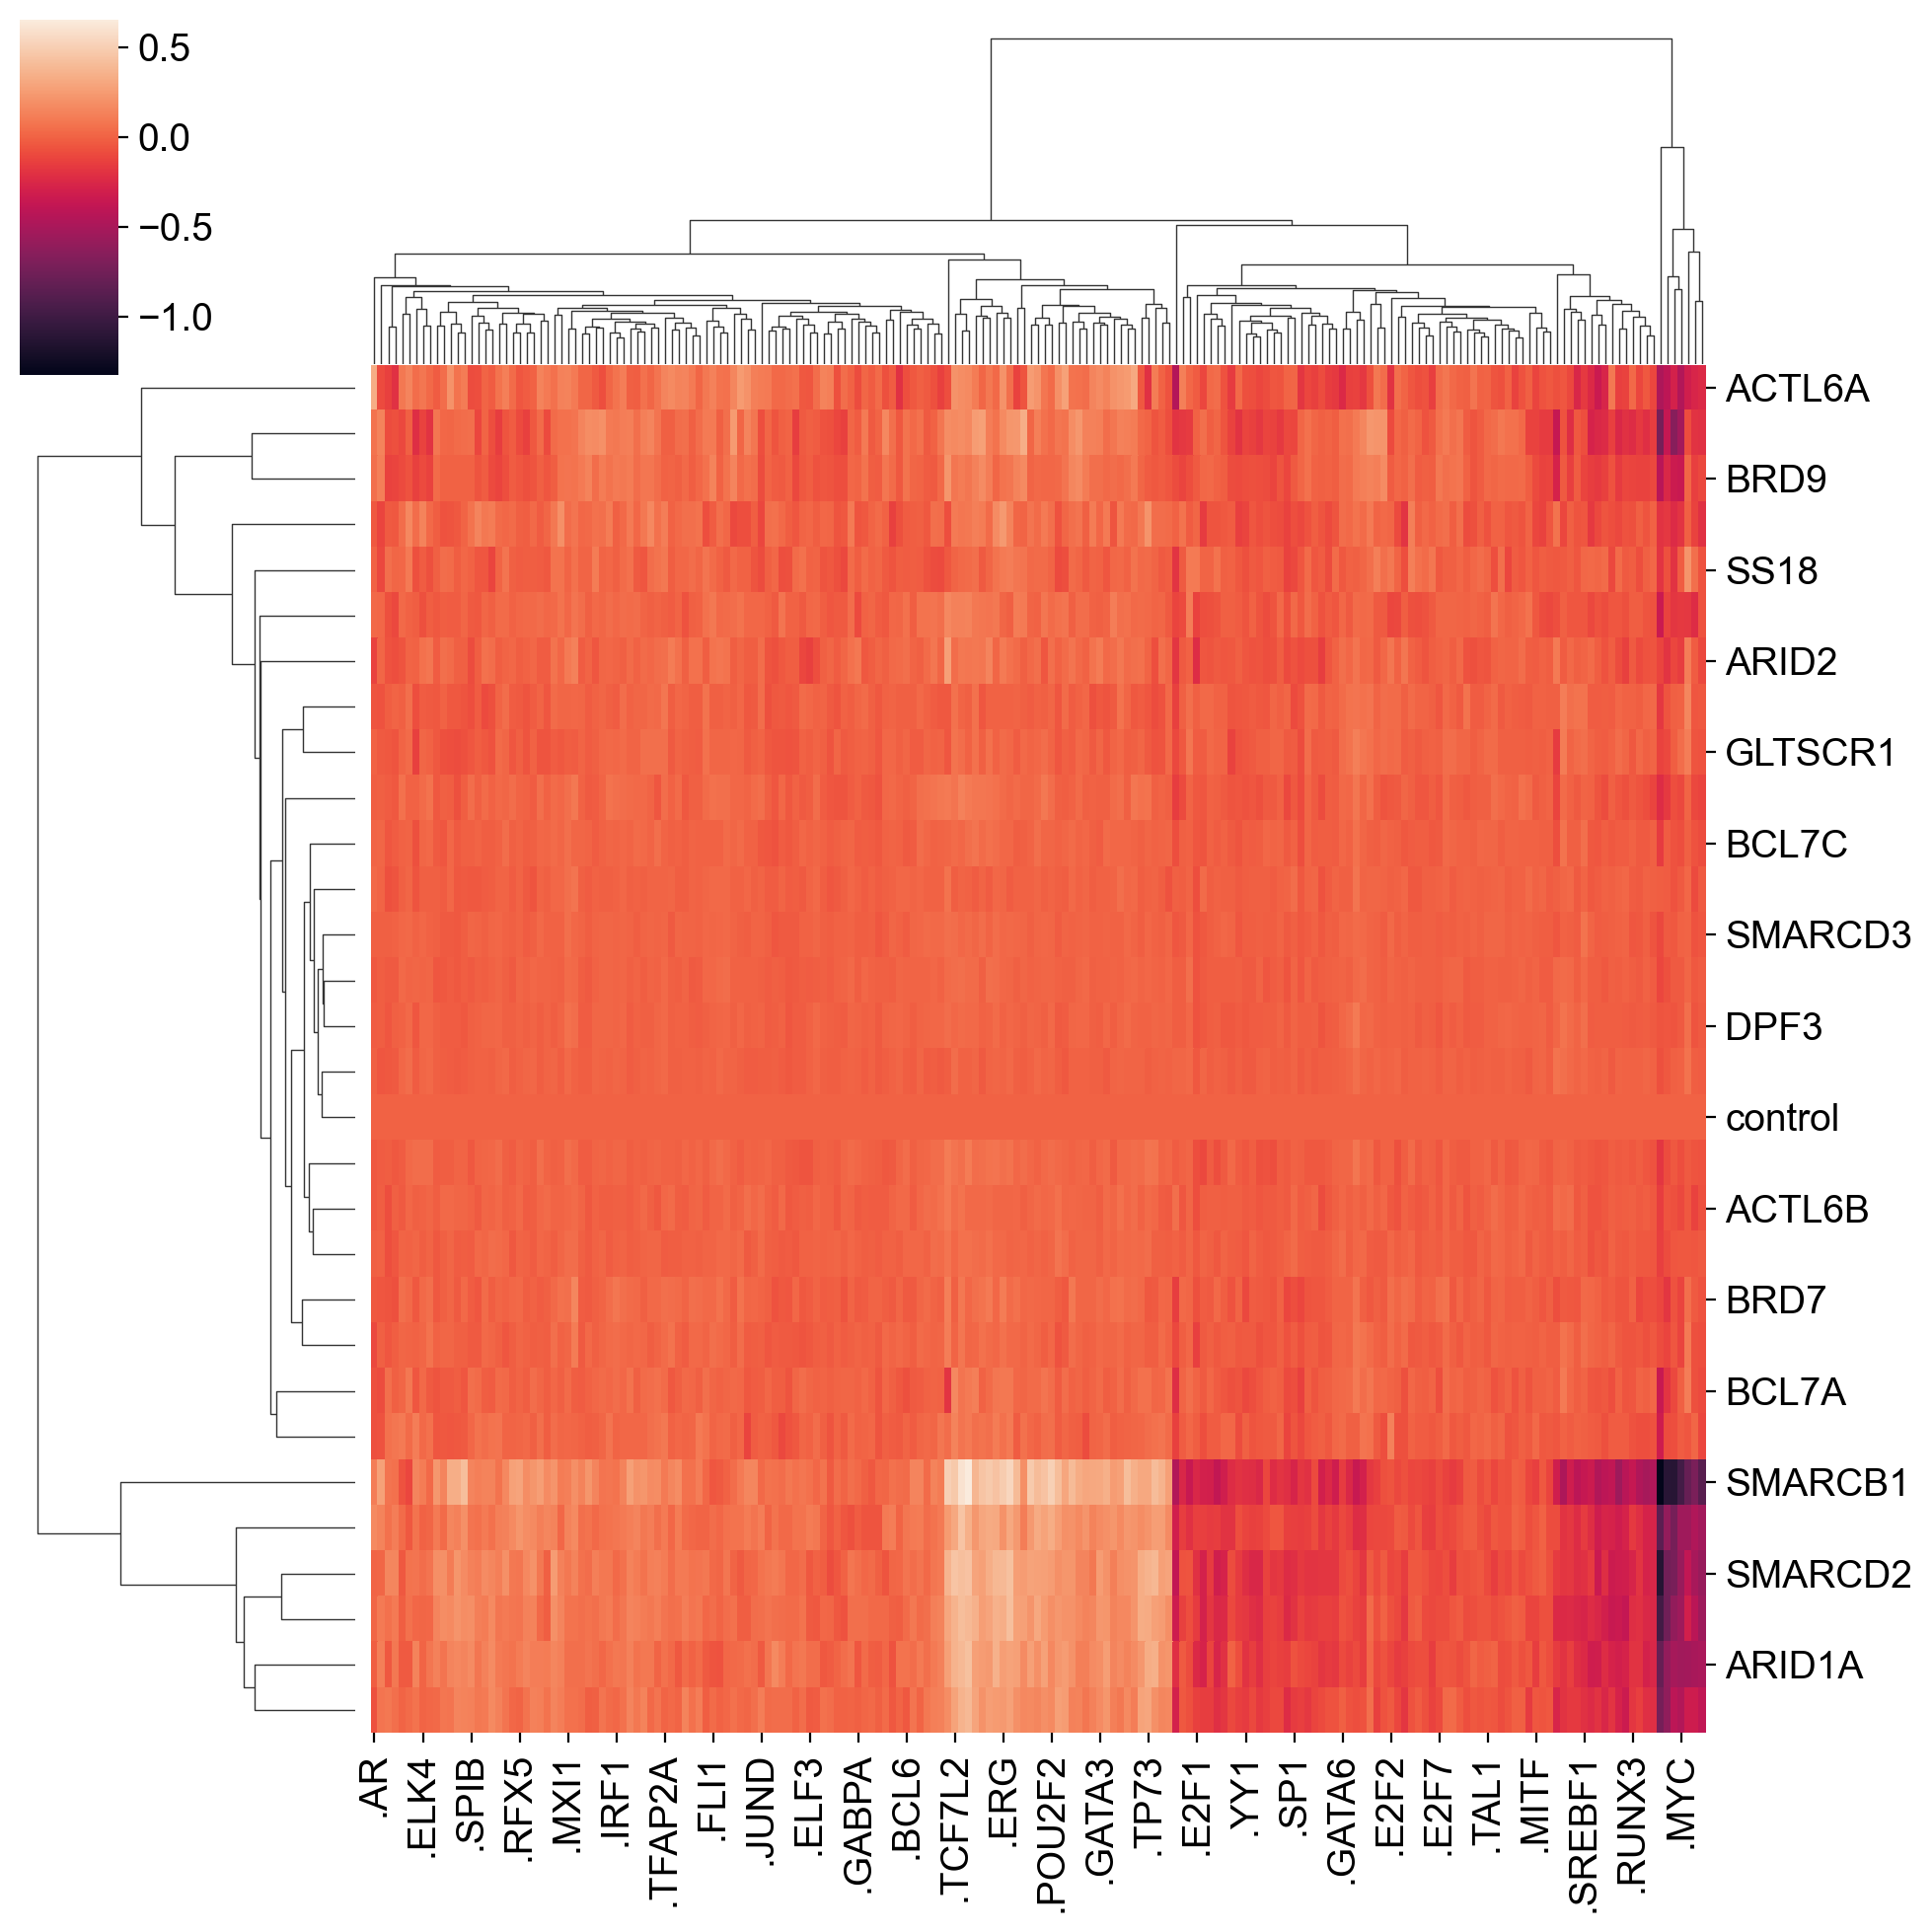

In [19]:
g=sns.clustermap(x[0])
sorted_tfs=x[0].columns[g.dendrogram_col.reordered_ind]
print(sorted_tfs)

In [20]:
sorted_tfs

Index(['.AR', '.USF1', '.E2F5', '.TEAD4', '.STAT5A', '.USF2', '.SNAI2',
       '.ELK4', '.TFAP2C', '.ZBTB7A',
       ...
       '.THAP11', '.BHLHE40', '.STAT2', '.LEF1', '.ATF6', '.HBP1', '.MYC',
       '.E2F4', '.MYCN', '.NR2F2'],
      dtype='object', length=193)

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


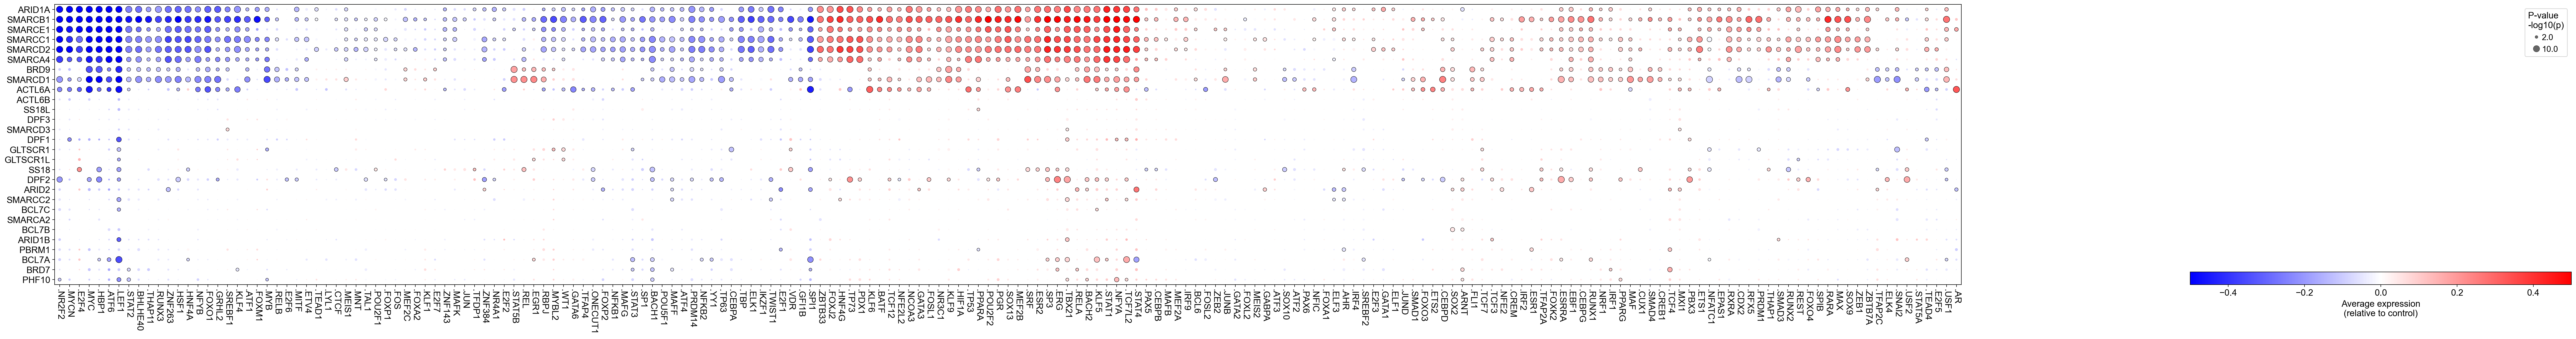

In [22]:
perturb.pl.dotplot2(x[0],x[1],sorted_tfs,genes[::1],w=70,h=8,best_p=1e-10,
        title='Average expression\n(relative to control)')

In [8]:
keep=['JUND','FOSL2','NFE2','RUNX2',
     'CTCF','SNAI2',
      'BATF','CEBPA','ETV4','ATF4','GATA1',  
     ]

tftf=net.loc[net['target'].isin(keep),:]
tftf.sort_values(by='target')

source confidence target    weight
5458      MYC          A   ATF4  1.000000
21600    ETS1          C   ATF4  0.333333
17103    USF2          C   ATF4  0.333333
12388     VDR          B   ATF4  0.500000
24974   NFKB1          C   BATF  0.333333
16335   RUNX3          C   BATF  0.333333
3811    HNF4A          A  CEBPA  1.000000
5784     USF1          A  CEBPA  1.000000
3837      MYC          A  CEBPA -1.000000
3841      MYB          A  CEBPA  1.000000
4053    FOXA1          A  CEBPA  1.000000
1031      YY1          A   CTCF  1.000000
5697    NFKB1          A   CTCF -1.000000
7854    HNF4A          B   ETV4  0.500000
9742     MITF          B   ETV4  0.500000
26454    CUX1          C   ETV4  0.333333
2511     ETS1          A   ETV4  1.000000
1297     E2F1          A   ETV4  1.000000
22618   FOSL2          C   ETV4  0.333333
10963    EGR1          B   ETV4  0.500000
30639   GATA3          C   ETV4  0.333333
11707  PRDM14          B  FOSL2  0.500000
27301     MYC          C  FOSL2  0.333333
23943   CEBPA          C  FOSL2  0.333333
5471     FLI1          A  GATA1  1.000000
2345    GATA2          A  GATA1  1.000000
2146     SPI1          A  GATA1  1.000000
4925    CEBPE          A  GATA1 -1.000000
21023    ESR2          C   JUND  0.333333
10269    E2F1          B   JUND  0.500000
30013   HIF1A          C   JUND  0.333333
22016    EGR1          C   JUND  0.333333
21307    ESR1          C   JUND  0.333333
2138    GATA1          A   NFE2  1.000000
22639    FOSB          C  RUNX2  0.333333
1193    TRPS1          A  RUNX2 -1.000000
4128      FOS          A  RUNX2  1.000000
14125   RUNX1          B  RUNX2  0.500000
3397      JUN          A  RUNX2  1.000000
2344     ESR1          A  RUNX2  1.000000
30953    JUND          C  RUNX2  0.333333
29733   GATA3          C  SNAI2  0.333333
569      MITF          A  SNAI2  1.000000
4121     LEF1          A  SNAI2  1.000000
1179   TCF7L2          A  SNAI2  1.000000
4436       AR          A  SNAI2  1.000000
5916     TCF7          A  SNAI2  1.000000

In [9]:
tfmat=tftf.pivot(index='source', columns='target', values='weight')
tfmat=tfmat.fillna(0)

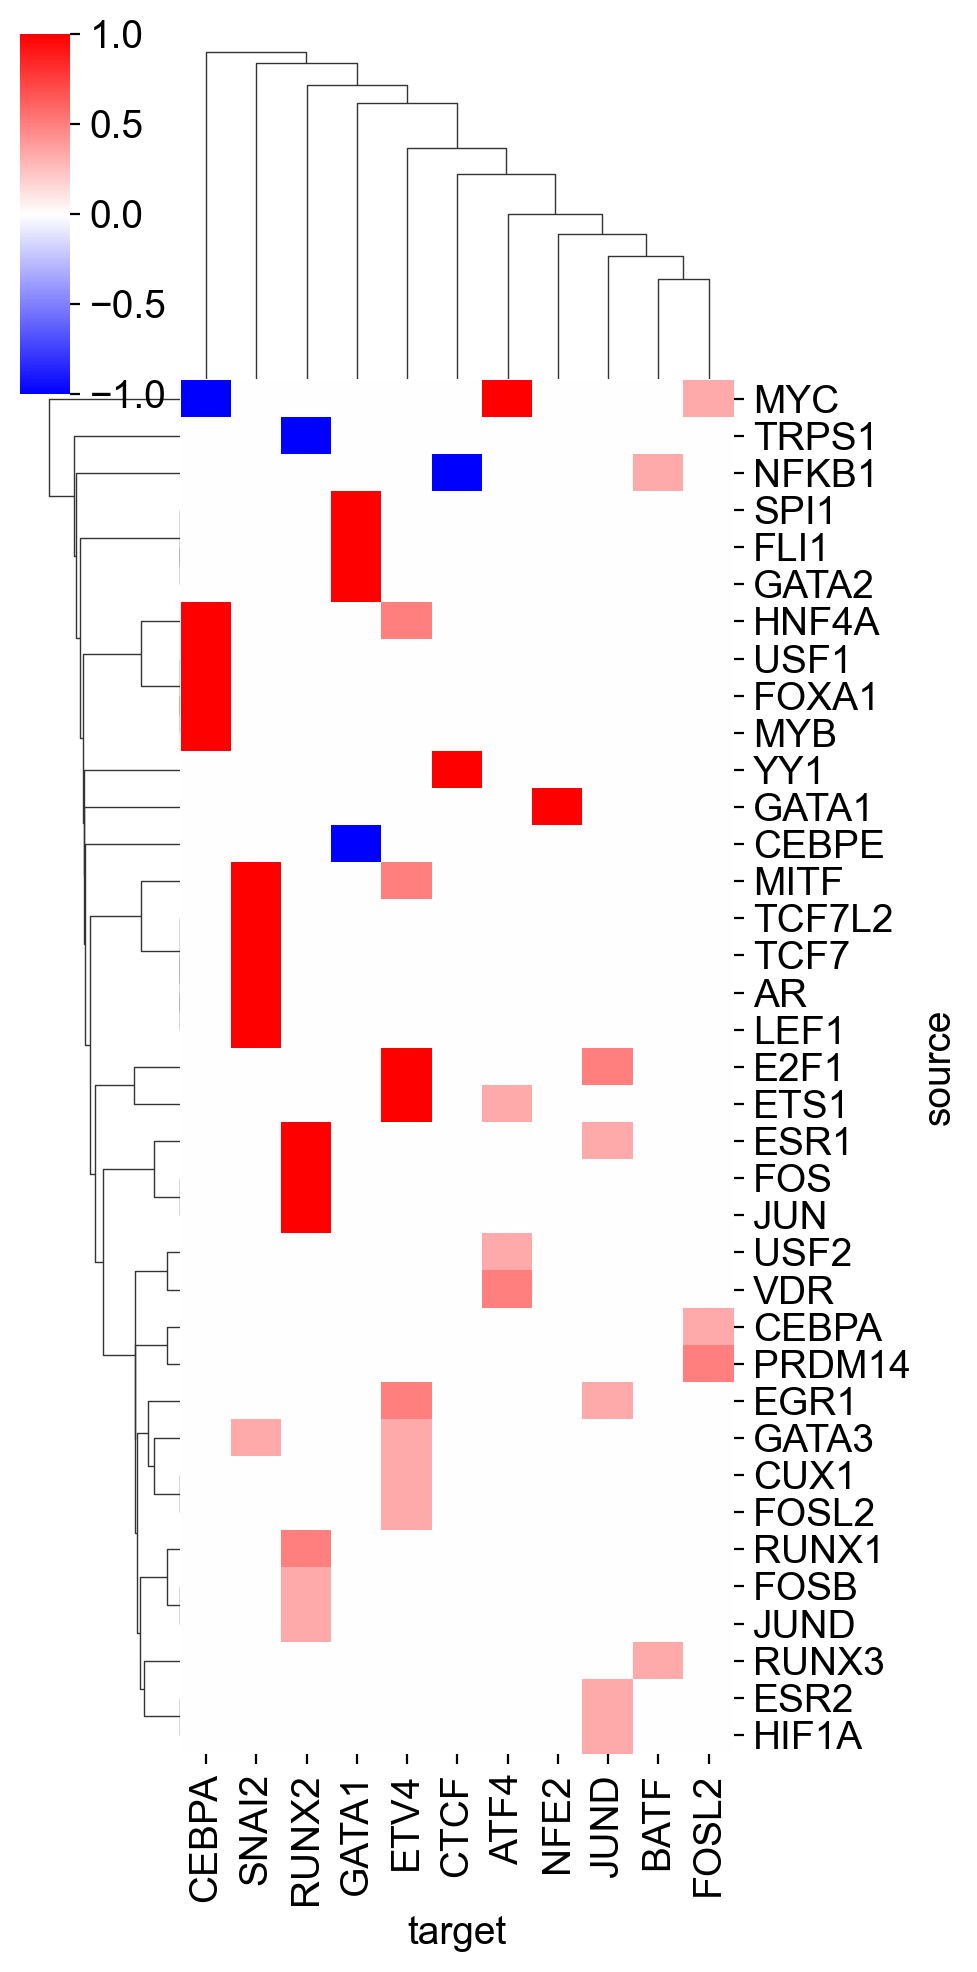

In [10]:
x=1

sns.clustermap(tfmat,
               vmin=-x,vmax=x,cmap='bwr',
               figsize=(5,10),xticklabels=True,yticklabels=True,
              )

In [11]:
import networkx as nx
import decorator
G = nx.Graph()

In [16]:
G = nx.from_pandas_edgelist(tftf, 'source', 'target',edge_attr='weight')
G = nx.from_pandas_edgelist(tftf, edge_attr=True,create_using=nx.DiGraph())

In [22]:
dd={'CTCF':-1,'USF1':1}
nx.set_node_attributes(G, dd, "test")

In [25]:
G.nodes()

NodeView(('MITF', 'SNAI2', 'YY1', 'CTCF', 'TCF7L2', 'TRPS1', 'RUNX2', 'E2F1', 'ETV4', 'GATA1', 'NFE2', 'SPI1', 'ESR1', 'GATA2', 'ETS1', 'JUN', 'HNF4A', 'CEBPA', 'MYC', 'MYB', 'FOXA1', 'LEF1', 'FOS', 'AR', 'CEBPE', 'ATF4', 'FLI1', 'NFKB1', 'USF1', 'TCF7', 'JUND', 'EGR1', 'PRDM14', 'FOSL2', 'VDR', 'RUNX1', 'RUNX3', 'BATF', 'USF2', 'ESR2', 'FOSB', 'CUX1', 'GATA3', 'HIF1A'))

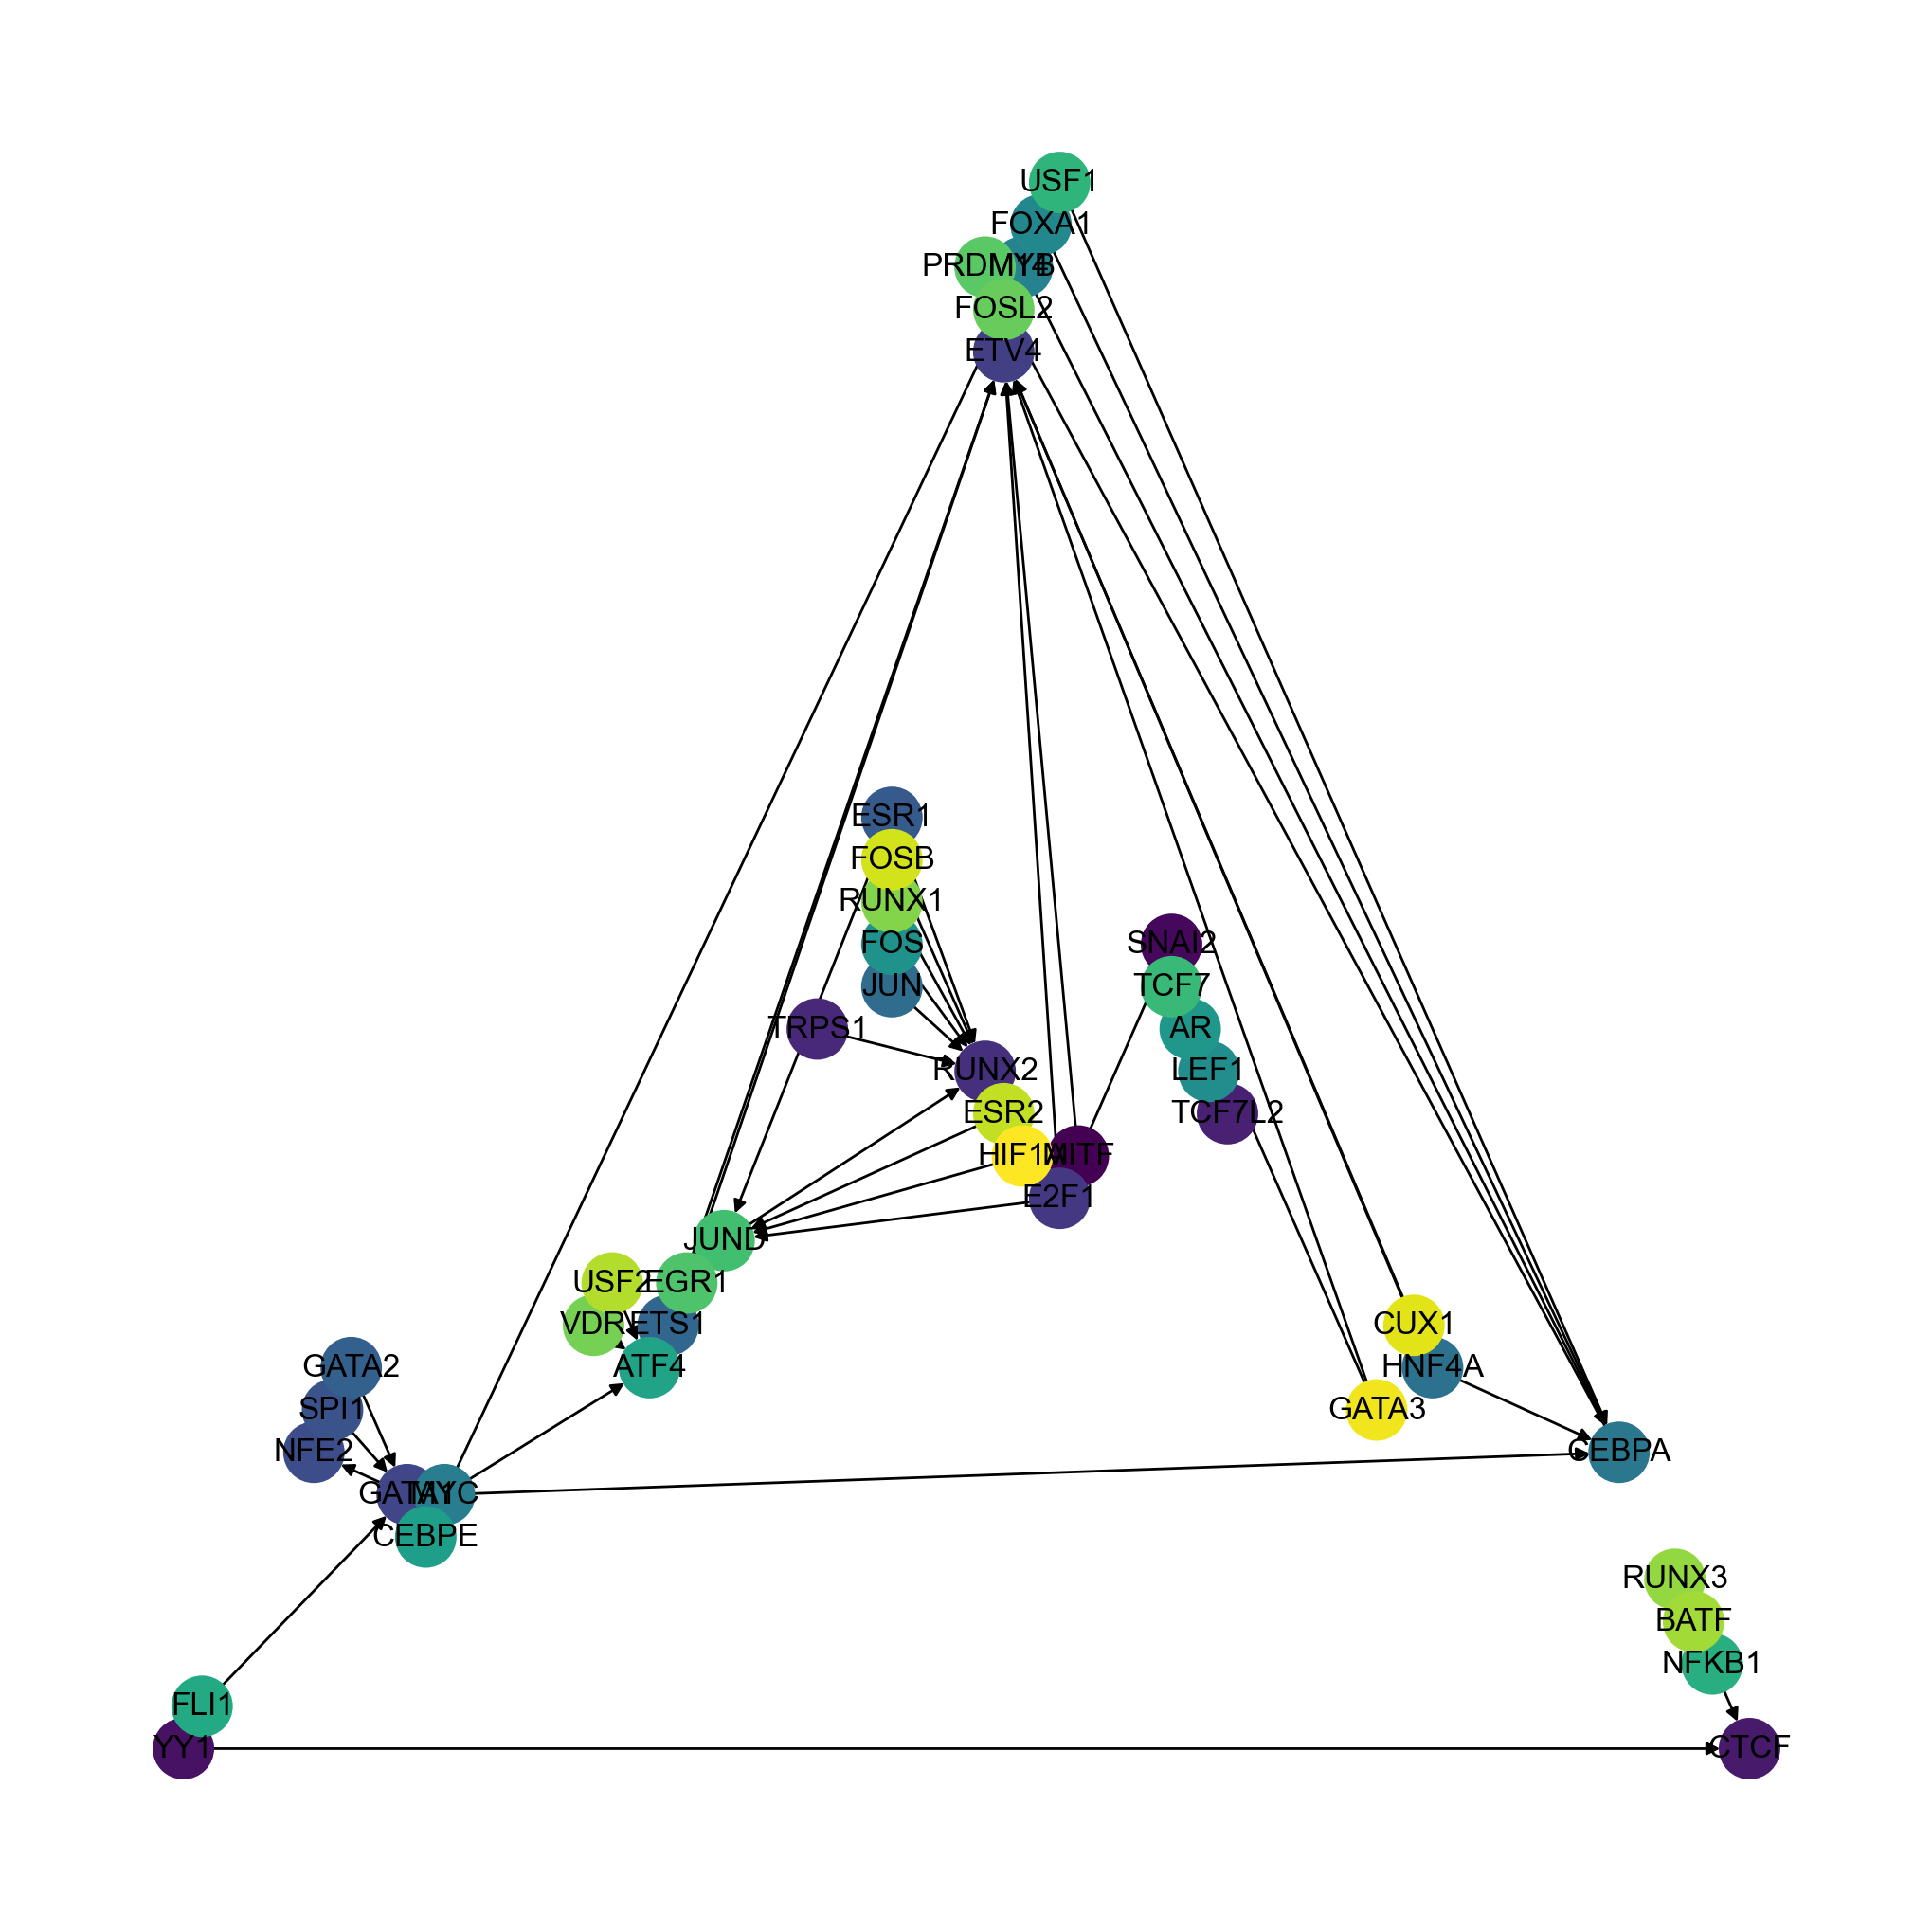

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
nx.draw_planar(G,with_labels=True,arrows=True,node_color=range(len(G.nodes())),node_size=500)

In [ ]:
G.is_directed()

In [26]:
dc.run_mlm(mat=adata, net=net, source='source', target='target', weight='weight', verbose=True)


  0%|          | 0/4 [00:00<?, ?it/s]

Running mlm on mat with 38677 samples and 1246 targets for 193 sources.


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


In [27]:
adata.obsm['mlm_estimate']

AHR        AR      ARNT      ATF1      ATF2  \
TCGCTTGTCCAGTTCC-1-12 -0.736763  0.110982  0.331540  1.835443  0.850514   
TTGGGATGTTTGTGGT-1-2  -0.380596  0.814610 -0.262122  1.021414  0.825175   
TTGCTGCGTCCAGAAG-1-5  -1.040608 -1.031871  0.372277  0.755334  1.937320   
CCTCTAGCAACCCGCA-1-0  -0.950454 -1.010268  0.168431 -0.523395  1.099777   
GAGGGATGTACTAGCT-1-11 -0.963468  0.785278  0.186588  1.291969  1.548516   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3  -0.387162 -1.446294  0.004918  0.501521  1.590250   
GTCACTCTCTATGTGG-1-0  -1.292183 -0.294351  0.674597  0.912248  0.268279   
ATTGGGTAGGCCTGAA-1-3  -1.061468 -0.460735  0.551831  0.120243  1.110852   
CCTTCAGGTTCCTAGA-1-12 -1.293530 -0.407544  0.292208  1.269915  0.319760   
GGTAATCGTTCGAACT-1-6  -1.036927 -0.897374  0.582147  1.645398  1.075966   

                           ATF3      ATF4      ATF6     BACH1     BACH2  ...  \
TCGCTTGTCCAGTTCC-1-12 -0.893807 -0.802107 -0.022454 -1.009330  1.185269  ...   
TTGGGATGTTTGTGGT-1-2  -0.513643 -1.150339  2.944789 -0.461268  1.553007  ...   
TTGCTGCGTCCAGAAG-1-5  -1.198446 -0.847993  2.573802 -1.368577  0.789595  ...   
CCTCTAGCAACCCGCA-1-0  -0.546215  0.453705  3.463343 -1.059251  0.558274  ...   
GAGGGATGTACTAGCT-1-11 -0.370667 -0.008515  2.652052  0.007558  0.481167  ...   
...                         ...       ...       ...       ...       ...  ...   
CAATTTCAGTCGAAAT-1-3  -0.049124 -1.397390  0.282392 -0.684076  0.673949  ...   
GTCACTCTCTATGTGG-1-0  -1.010525 -0.960843  4.525792 -0.765057  0.024338  ...   
ATTGGGTAGGCCTGAA-1-3  -2.438320 -1.025396  3.384354 -0.850767  1.280439  ...   
CCTTCAGGTTCCTAGA-1-12 -0.295338 -0.487267  4.818632  0.118639  0.247381  ...   
GGTAATCGTTCGAACT-1-6  -0.380641 -0.726094  1.884310  0.391145 -0.200039  ...   

                            VDR       WT1       YY1    ZBTB33    ZBTB7A  \
TCGCTTGTCCAGTTCC-1-12  2.697524  1.535512 -0.643065  1.876647  0.368832   
TTGGGATGTTTGTGGT-1-2   2.785379  0.836828  0.691292  2.101459 -0.117392   
TTGCTGCGTCCAGAAG-1-5   2.862326  0.015280 -0.448035  2.893718 -0.626217   
CCTCTAGCAACCCGCA-1-0   2.674715  1.308887  0.130388  1.484859  0.001373   
GAGGGATGTACTAGCT-1-11  3.369871  1.039583 -0.779091  1.873165 -0.315783   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3   2.391294  1.534938 -1.380985  1.496470 -0.606861   
GTCACTCTCTATGTGG-1-0   2.340390  1.031349 -0.969671  1.471996  0.415353   
ATTGGGTAGGCCTGAA-1-3   2.788203  1.511531  0.340717  2.650945 -0.376512   
CCTTCAGGTTCCTAGA-1-12  2.525517  1.387425  0.742040  2.539429  0.162934   
GGTAATCGTTCGAACT-1-6   3.071440  1.126539 -0.831499  1.519309 -0.098260   

                           ZEB1      ZEB2    ZNF143    ZNF263    ZNF384  
TCGCTTGTCCAGTTCC-1-12  0.225446  0.485492  0.472414  0.341778  0.079223  
TTGGGATGTTTGTGGT-1-2  -0.271484  1.227852  0.369912  0.965490  3.072759  
TTGCTGCGTCCAGAAG-1-5  -0.263281  0.344804  0.539218  1.232525  1.337816  
CCTCTAGCAACCCGCA-1-0  -1.216199  0.096655 -0.067699  0.717398  0.715457  
GAGGGATGTACTAGCT-1-11 -0.129248  0.841411 -0.566766  1.104512 -0.560210  
...                         ...       ...       ...       ...       ...  
CAATTTCAGTCGAAAT-1-3  -0.268535  1.850636  0.299105  0.581847  0.438597  
GTCACTCTCTATGTGG-1-0   0.239157  1.687102  0.754658  0.874345  2.682374  
ATTGGGTAGGCCTGAA-1-3   0.110897  0.091617 -0.497788  0.683114  0.454322  
CCTTCAGGTTCCTAGA-1-12 -0.156090  0.265657  0.245958  1.655300  1.614860  
GGTAATCGTTCGAACT-1-6   0.545439  0.957273 -0.030931  1.083553  1.159378  

[38677 rows x 193 columns]

In [28]:
adata.obsm['dorothea_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['dorothea_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [29]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 38677 × 193
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSCR

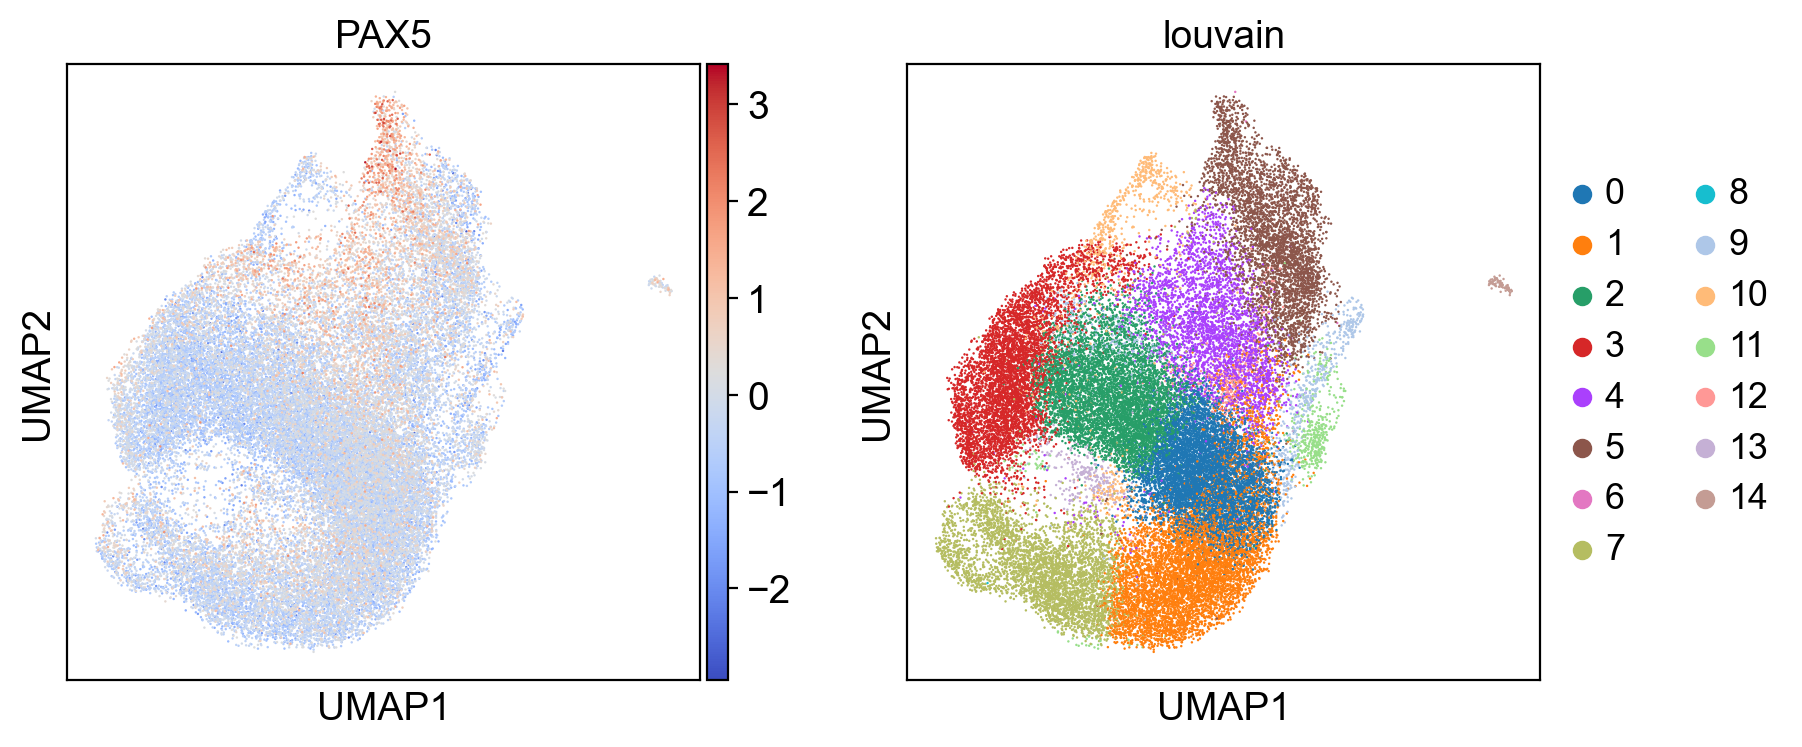

In [30]:
sc.pl.umap(acts, color=['PAX5', 'louvain'], cmap='coolwarm')

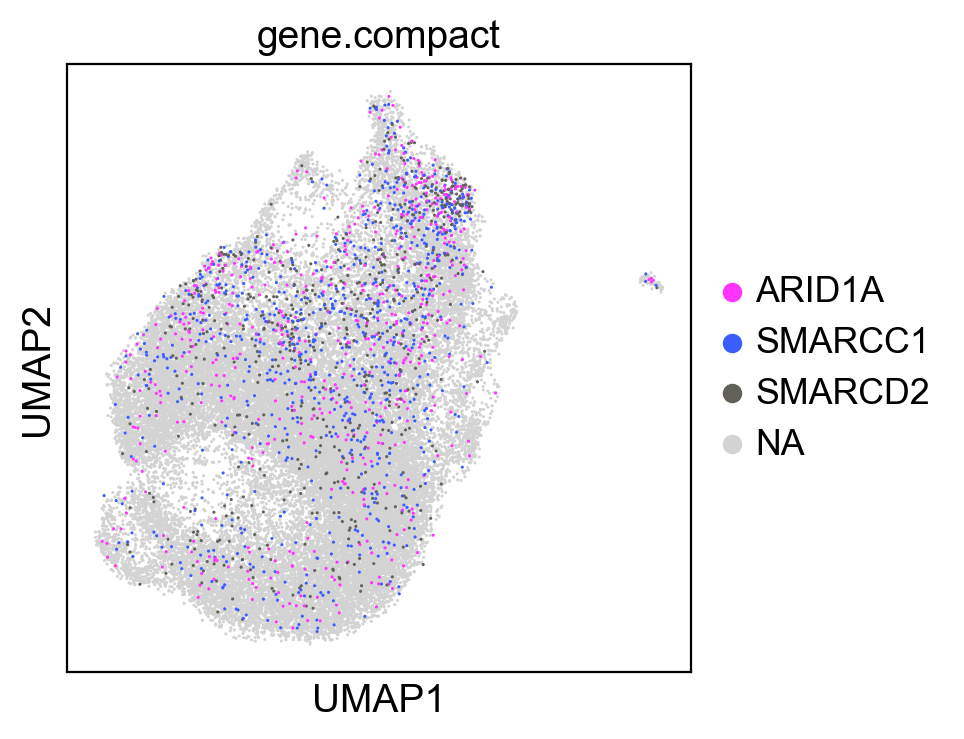

In [31]:
sc.pl.umap(adata,color='gene.compact',groups=['ARID1A','SMARCD2','SMARCC1'],s=5)

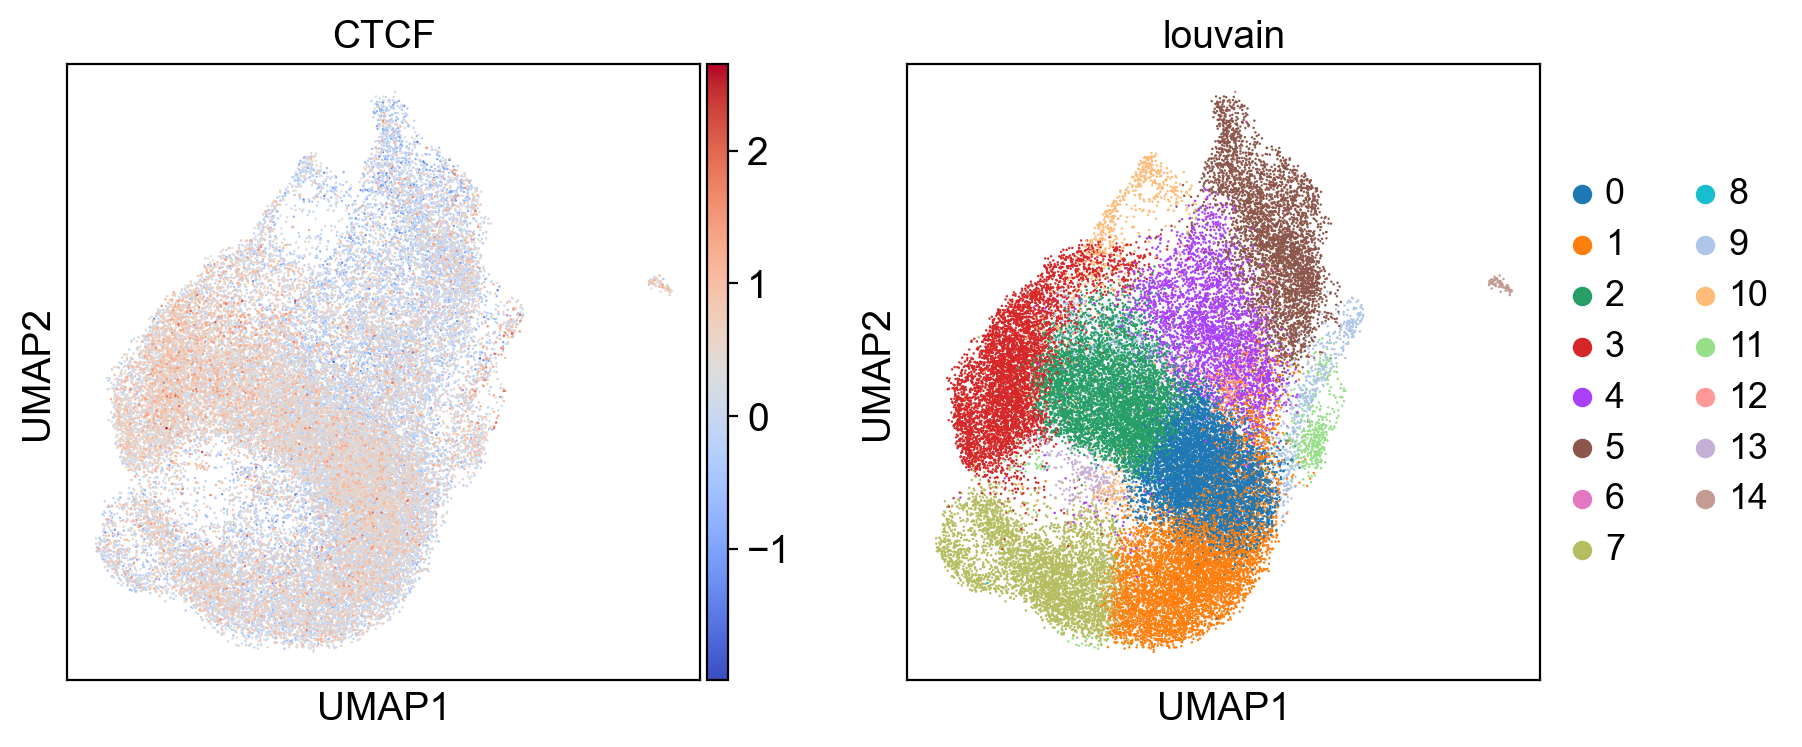

In [32]:
sc.pl.umap(acts, color=['CTCF', 'louvain'], cmap='coolwarm')

In [33]:
mean_acts = dc.summarize_acts(acts, groupby='gene.compact', min_std=0)#0.75)
mean_acts

AHR        AR      ARNT      ATF1      ATF2      ATF3  \
ACTL6A     -0.791688 -0.088253  0.268631  0.570551  1.307908 -0.695545   
ACTL6B     -0.755002 -0.454268  0.201610  0.720800  1.332250 -0.686398   
ARID1A     -0.655010 -0.431847  0.136274  0.530771  1.378836 -0.621421   
ARID1B     -0.734769 -0.486951  0.227204  0.646733  1.379063 -0.658841   
ARID2      -0.855574 -0.541074  0.282767  0.698511  1.347553 -0.629484   
BCL7A      -0.703349 -0.487008  0.195643  0.695654  1.384557 -0.679144   
BCL7B      -0.767723 -0.457288  0.234613  0.697749  1.370294 -0.661018   
BCL7C      -0.728206 -0.412709  0.193770  0.665044  1.367289 -0.675996   
BRD7       -0.788791 -0.458189  0.265102  0.634664  1.368838 -0.690190   
BRD9       -0.788547 -0.363661  0.199905  0.528877  1.297776 -0.674224   
DPF1       -0.779656 -0.383294  0.225430  0.628001  1.340715 -0.647279   
DPF2       -0.744631 -0.451774  0.252494  0.666002  1.318064 -0.594411   
DPF3       -0.769333 -0.441393  0.215444  0.708528  1.362172 -0.677846   
GLTSCR1    -0.751116 -0.415812  0.213711  0.680906  1.392127 -0.713097   
GLTSCR1L   -0.713382 -0.471043  0.186594  0.727236  1.320666 -0.707565   
PBRM1      -0.801501 -0.517837  0.238303  0.709168  1.373167 -0.700445   
PHF10      -0.783125 -0.435026  0.248011  0.673509  1.320363 -0.718512   
SMARCA2    -0.778953 -0.382463  0.227503  0.701268  1.342187 -0.669800   
SMARCA4    -0.702923 -0.482794  0.199307  0.511612  1.374379 -0.687502   
SMARCB1    -0.664362 -0.304342  0.163164  0.350569  1.421749 -0.639071   
SMARCC1    -0.680512 -0.404092  0.206647  0.442401  1.336404 -0.639870   
SMARCC2    -0.801949 -0.458586  0.248088  0.672499  1.353261 -0.654307   
SMARCD1    -0.782748 -0.347724  0.188502  0.452471  1.266481 -0.678863   
SMARCD2    -0.703292 -0.410998  0.215019  0.498397  1.324758 -0.613271   
SMARCD3    -0.746977 -0.421687  0.218973  0.662109  1.375278 -0.687636   
SMARCE1    -0.678350 -0.250462  0.220260  0.496860  1.375805 -0.762862   
SS18       -0.690426 -0.413658  0.200250  0.659267  1.302892 -0.656574   
SS18L      -0.747672 -0.427751  0.230314  0.689656  1.389471 -0.671085   
control    -0.751928 -0.418979  0.194600  0.668653  1.371885 -0.696879   
unassigned -0.772119 -0.424826  0.226891  0.704356  1.356931 -0.683535   

                ATF4      ATF6     BACH1     BACH2  ...       VDR       WT1  \
ACTL6A     -0.640210  2.016365 -0.539330  0.558786  ...  2.395175  0.758953   
ACTL6B     -0.581849  2.359979 -0.580708  0.581056  ...  2.387338  0.879478   
ARID1A     -0.690640  1.819704 -0.693900  0.803721  ...  2.285456  0.769218   
ARID1B     -0.584864  2.329123 -0.665134  0.616815  ...  2.391816  0.883538   
ARID2      -0.630757  2.230166 -0.639041  0.633894  ...  2.369470  0.915058   
BCL7A      -0.569164  2.227515 -0.638219  0.547998  ...  2.423949  0.930179   
BCL7B      -0.599584  2.342814 -0.598313  0.542174  ...  2.429971  0.879800   
BCL7C      -0.531607  2.390421 -0.575877  0.584408  ...  2.376224  0.892560   
BRD7       -0.595048  2.234223 -0.657759  0.616091  ...  2.388544  0.897543   
BRD9       -0.636027  2.171992 -0.651896  0.725852  ...  2.297249  0.926921   
DPF1       -0.642357  2.291208 -0.613223  0.629561  ...  2.488357  0.861132   
DPF2       -0.606183  2.248249 -0.667784  0.657439  ...  2.348999  0.920067   
DPF3       -0.570270  2.368587 -0.576569  0.543545  ...  2.392859  0.938213   
GLTSCR1    -0.564393  2.315296 -0.579518  0.542749  ...  2.456086  0.960270   
GLTSCR1L   -0.603211  2.362359 -0.531353  0.501313  ...  2.425487  0.963984   
PBRM1      -0.599729  2.300682 -0.609279  0.605247  ...  2.391988  0.898153   
PHF10      -0.588649  2.250180 -0.644336  0.634992  ...  2.380297  0.917474   
SMARCA2    -0.560840  2.395201 -0.535825  0.553209  ...  2.378026  0.885457   
SMARCA4    -0.694301  1.806094 -0.772264  0.751932  ...  2.300565  0.828220   
SMARCB1    -0.664265  1.301126 -0.754388  0.994278  ...  2.014332  0.645913   
SMARCC1    -0.687022  1.656322 -0.781927  0.813138  ...  2.2977

In [34]:
import networkx as nx
import decorator
G = nx.Graph()

In [35]:
G = nx.from_pandas_edgelist(tftf, 'source', 'target',edge_attr='weight')
G = nx.from_pandas_edgelist(tftf, edge_attr=True,create_using=nx.DiGraph())

In [66]:
mean_acts2=mean_acts-mean_acts.loc['control',:]

In [67]:
nattr=pd.DataFrame({'value':0},index=list(G.nodes()))
common=list(set(list(G.nodes())).intersection(set(mean_acts2.columns)))
nattr.loc[common,'value']=mean_acts2.loc['ARID1A',common]


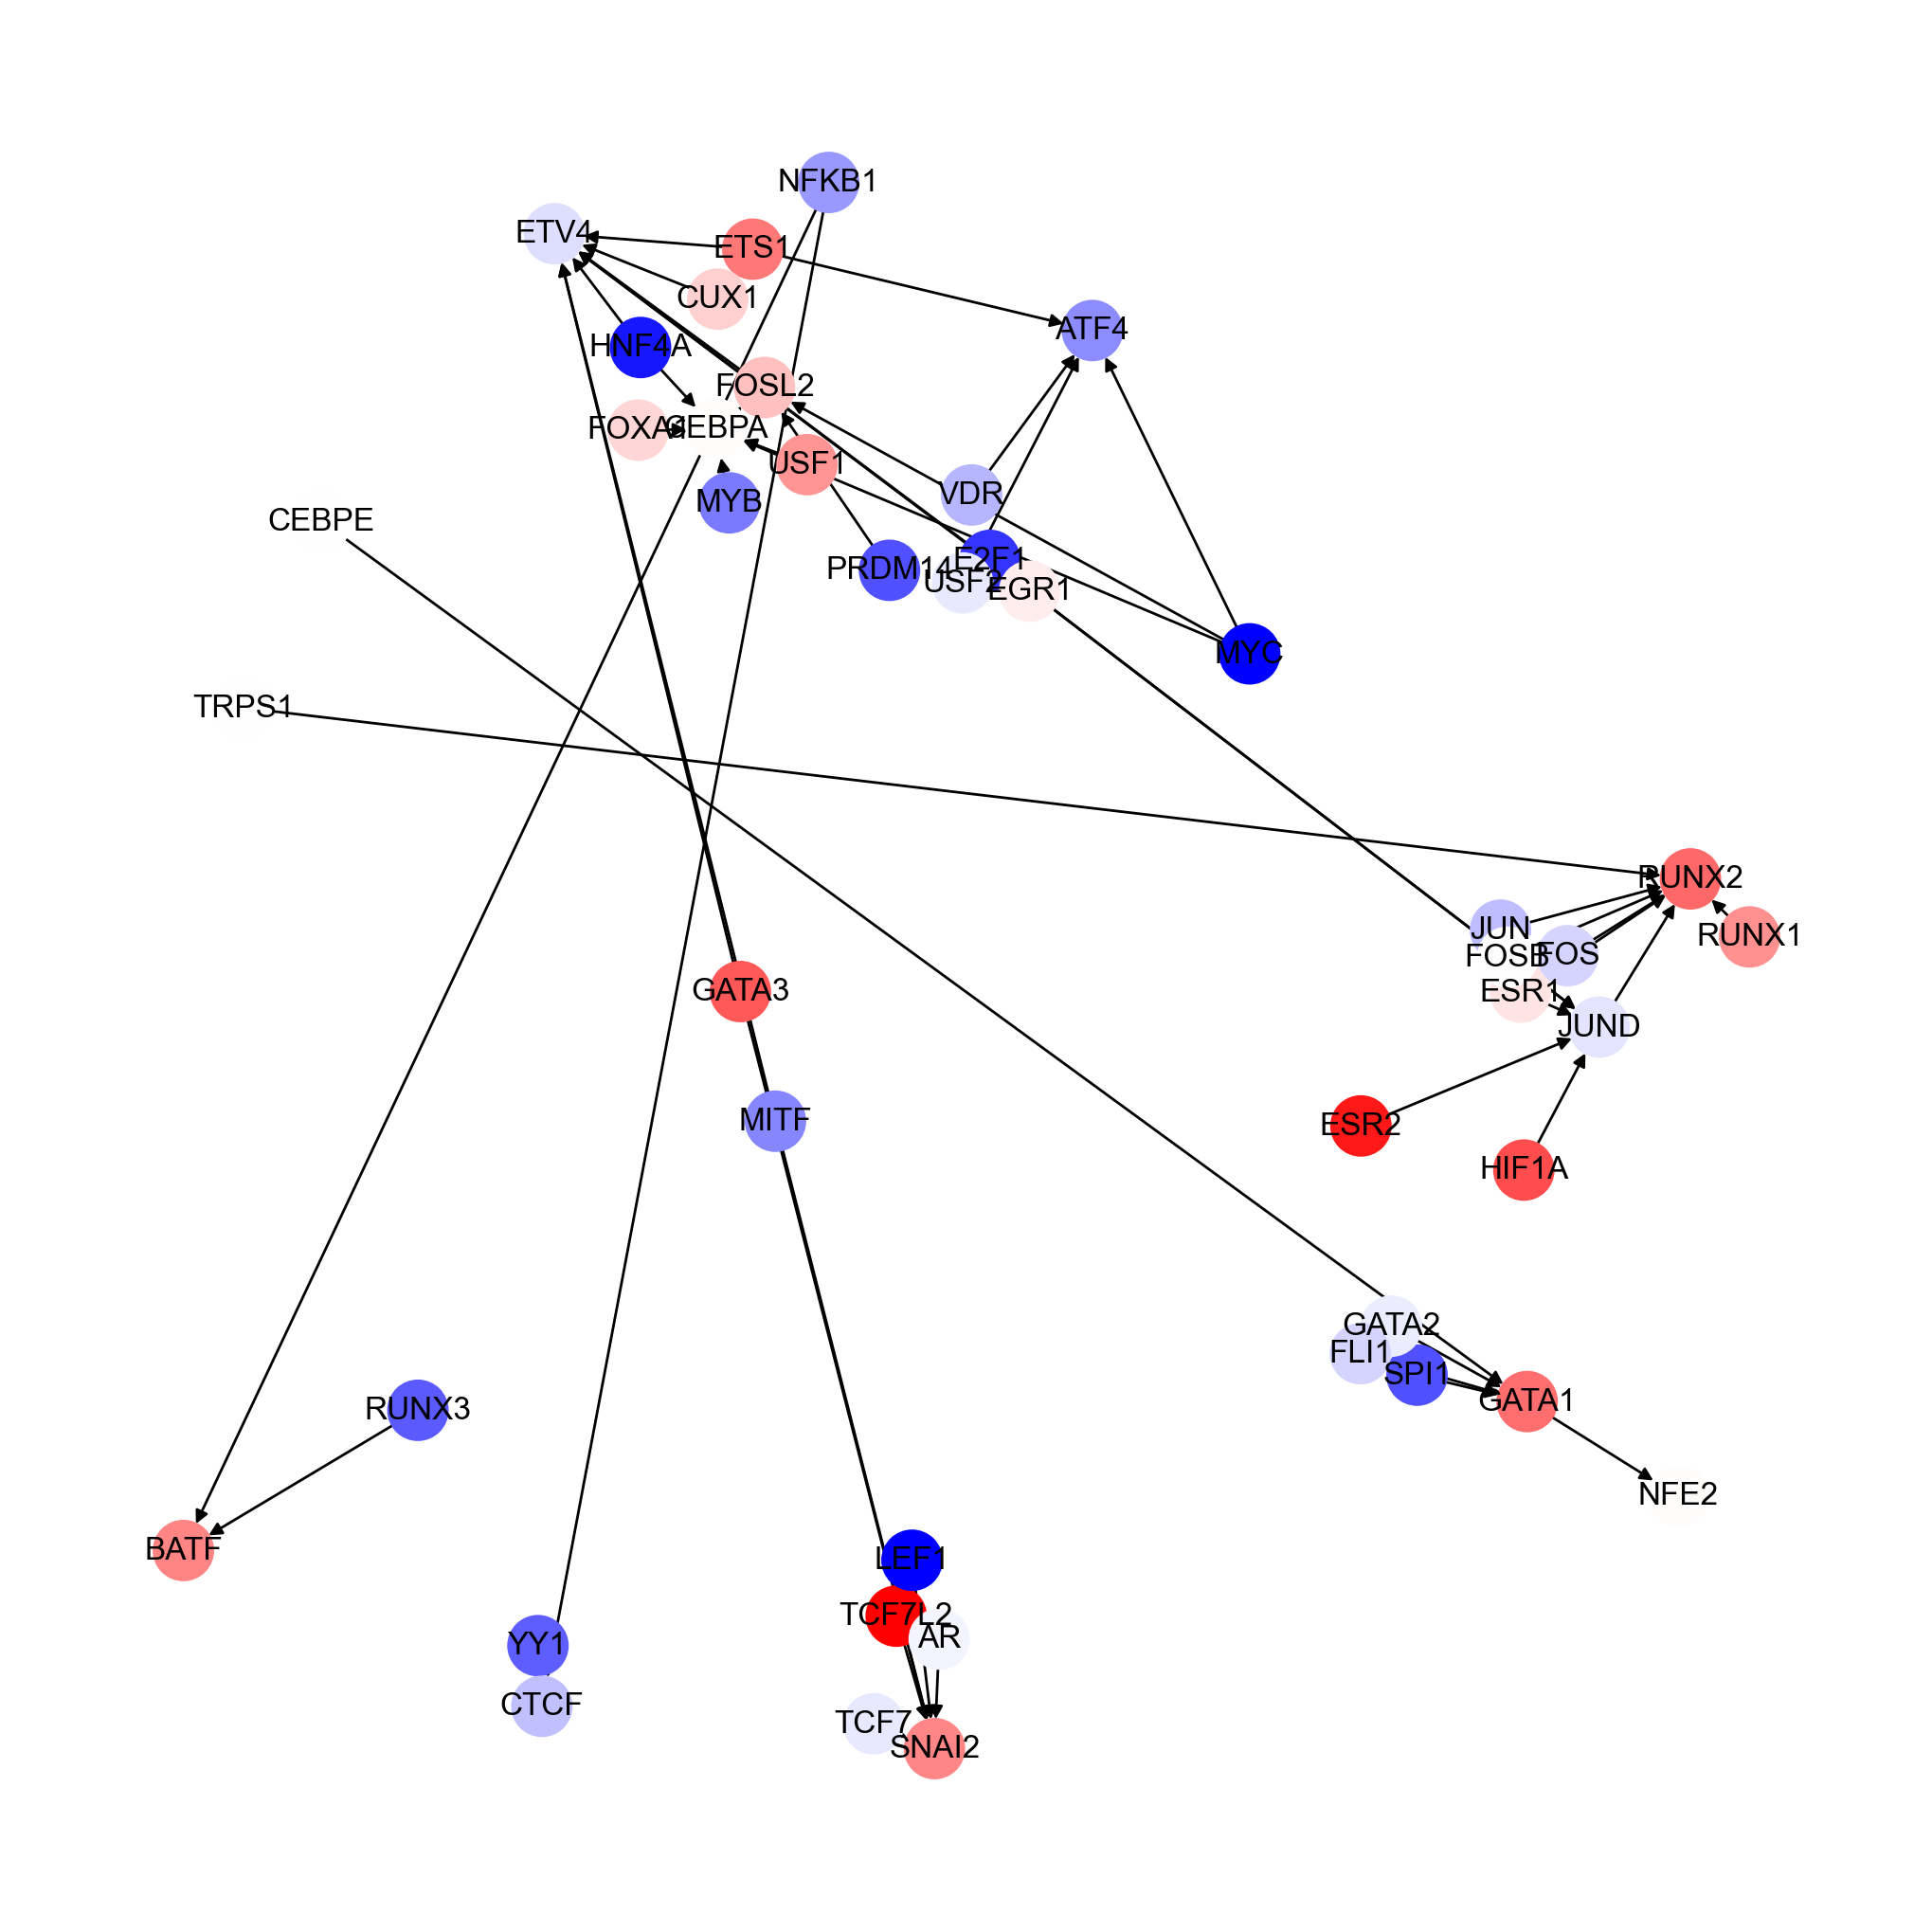

In [70]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
x=0.3
nx.draw_spring(G,with_labels=True,arrows=True,node_color=nattr['value'],
               cmap='bwr',vmin=-x,vmax=x,
               node_size=500)

In [72]:
#look at TFs sig DE

adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [74]:
adata.obsm['dorothea_mlm_estimate']

AHR        AR      ARNT      ATF1      ATF2  \
TCGCTTGTCCAGTTCC-1-12 -0.736763  0.110982  0.331540  1.835443  0.850514   
TTGGGATGTTTGTGGT-1-2  -0.380596  0.814610 -0.262122  1.021414  0.825175   
TTGCTGCGTCCAGAAG-1-5  -1.040608 -1.031871  0.372277  0.755334  1.937320   
CCTCTAGCAACCCGCA-1-0  -0.950454 -1.010268  0.168431 -0.523395  1.099777   
GAGGGATGTACTAGCT-1-11 -0.963468  0.785278  0.186588  1.291969  1.548516   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3  -0.387162 -1.446294  0.004918  0.501521  1.590250   
GTCACTCTCTATGTGG-1-0  -1.292183 -0.294351  0.674597  0.912248  0.268279   
ATTGGGTAGGCCTGAA-1-3  -1.061468 -0.460735  0.551831  0.120243  1.110852   
CCTTCAGGTTCCTAGA-1-12 -1.293530 -0.407544  0.292208  1.269915  0.319760   
GGTAATCGTTCGAACT-1-6  -1.036927 -0.897374  0.582147  1.645398  1.075966   

                           ATF3      ATF4      ATF6     BACH1     BACH2  ...  \
TCGCTTGTCCAGTTCC-1-12 -0.893807 -0.802107 -0.022454 -1.009330  1.185269  ...   
TTGGGATGTTTGTGGT-1-2  -0.513643 -1.150339  2.944789 -0.461268  1.553007  ...   
TTGCTGCGTCCAGAAG-1-5  -1.198446 -0.847993  2.573802 -1.368577  0.789595  ...   
CCTCTAGCAACCCGCA-1-0  -0.546215  0.453705  3.463343 -1.059251  0.558274  ...   
GAGGGATGTACTAGCT-1-11 -0.370667 -0.008515  2.652052  0.007558  0.481167  ...   
...                         ...       ...       ...       ...       ...  ...   
CAATTTCAGTCGAAAT-1-3  -0.049124 -1.397390  0.282392 -0.684076  0.673949  ...   
GTCACTCTCTATGTGG-1-0  -1.010525 -0.960843  4.525792 -0.765057  0.024338  ...   
ATTGGGTAGGCCTGAA-1-3  -2.438320 -1.025396  3.384354 -0.850767  1.280439  ...   
CCTTCAGGTTCCTAGA-1-12 -0.295338 -0.487267  4.818632  0.118639  0.247381  ...   
GGTAATCGTTCGAACT-1-6  -0.380641 -0.726094  1.884310  0.391145 -0.200039  ...   

                            VDR       WT1       YY1    ZBTB33    ZBTB7A  \
TCGCTTGTCCAGTTCC-1-12  2.697524  1.535512 -0.643065  1.876647  0.368832   
TTGGGATGTTTGTGGT-1-2   2.785379  0.836828  0.691292  2.101459 -0.117392   
TTGCTGCGTCCAGAAG-1-5   2.862326  0.015280 -0.448035  2.893718 -0.626217   
CCTCTAGCAACCCGCA-1-0   2.674715  1.308887  0.130388  1.484859  0.001373   
GAGGGATGTACTAGCT-1-11  3.369871  1.039583 -0.779091  1.873165 -0.315783   
...                         ...       ...       ...       ...       ...   
CAATTTCAGTCGAAAT-1-3   2.391294  1.534938 -1.380985  1.496470 -0.606861   
GTCACTCTCTATGTGG-1-0   2.340390  1.031349 -0.969671  1.471996  0.415353   
ATTGGGTAGGCCTGAA-1-3   2.788203  1.511531  0.340717  2.650945 -0.376512   
CCTTCAGGTTCCTAGA-1-12  2.525517  1.387425  0.742040  2.539429  0.162934   
GGTAATCGTTCGAACT-1-6   3.071440  1.126539 -0.831499  1.519309 -0.098260   

                           ZEB1      ZEB2    ZNF143    ZNF263    ZNF384  
TCGCTTGTCCAGTTCC-1-12  0.225446  0.485492  0.472414  0.341778  0.079223  
TTGGGATGTTTGTGGT-1-2  -0.271484  1.227852  0.369912  0.965490  3.072759  
TTGCTGCGTCCAGAAG-1-5  -0.263281  0.344804  0.539218  1.232525  1.337816  
CCTCTAGCAACCCGCA-1-0  -1.216199  0.096655 -0.067699  0.717398  0.715457  
GAGGGATGTACTAGCT-1-11 -0.129248  0.841411 -0.566766  1.104512 -0.560210  
...                         ...       ...       ...       ...       ...  
CAATTTCAGTCGAAAT-1-3  -0.268535  1.850636  0.299105  0.581847  0.438597  
GTCACTCTCTATGTGG-1-0   0.239157  1.687102  0.754658  0.874345  2.682374  
ATTGGGTAGGCCTGAA-1-3   0.110897  0.091617 -0.497788  0.683114  0.454322  
CCTTCAGGTTCCTAGA-1-12 -0.156090  0.265657  0.245958  1.655300  1.614860  
GGTAATCGTTCGAACT-1-6   0.545439  0.957273 -0.030931  1.083553  1.159378  

[38677 rows x 193 columns]

In [105]:
tfs=adata.obsm['dorothea_mlm_estimate'].columns
for tf in tfs:
    adata.obs['.'+tf]=adata.obsm['dorothea_mlm_estimate'][tf]
    

In [106]:
x=perturb.pp.obs_mean_with_sig(adata,
                    obs_list=['.'+tf for tf in tfs],
                    ref='control',
                   grouping_variable='gene.compact')

.AHR
.AR
.ARNT
.ATF1
.ATF2
.ATF3
.ATF4
.ATF6
.BACH1
.BACH2
.BATF
.BCL6
.BHLHE40
.CDX2
.CEBPA
.CEBPB
.CEBPD
.CEBPG
.CREB1
.CREM
.CTCF
.CUX1
.E2F1
.E2F2
.E2F3
.E2F4
.E2F5
.E2F6
.E2F7
.EBF1
.EGR1
.ELF1
.ELF3
.ELK1
.ELK4
.EPAS1
.ERG
.ESR1
.ESR2
.ESRRA
.ETS1
.ETS2
.ETV4
.FLI1
.FOS
.FOSL1
.FOSL2
.FOXA1
.FOXA2
.FOXJ2
.FOXK2
.FOXL2
.FOXM1
.FOXO1
.FOXO3
.FOXO4
.FOXP1
.FOXP2
.GABPA
.GATA1
.GATA2
.GATA3
.GATA6
.GFI1B
.GRHL2
.HBP1
.HIF1A
.HNF4A
.HNF4G
.HSF1
.IKZF1
.IRF1
.IRF2
.IRF4
.IRF9
.JUN
.JUNB
.JUND
.KLF1
.KLF4
.KLF5
.KLF6
.KLF9
.LEF1
.LYL1
.MAF
.MAFB
.MAFF
.MAFG
.MAFK
.MAX
.MEF2A
.MEF2B
.MEF2C
.MEIS1
.MEIS2
.MITF
.MNT
.MXI1
.MYB
.MYBL2
.MYC
.MYCN
.NCOA3
.NFATC1
.NFE2
.NFE2L2
.NFIC
.NFKB1
.NFKB2
.NFYA
.NFYB
.NR2F2
.NR3C1
.NR4A1
.NRF1
.ONECUT1
.PAX5
.PAX6
.PBX3
.PDX1
.PGR
.POU2F1
.POU2F2
.POU5F1
.PPARA
.PPARG
.PRDM1
.PRDM14
.RARA
.RBPJ
.REL
.RELA
.RELB
.REST
.RFX5
.RUNX1
.RUNX2
.RUNX3
.RXRA
.SMAD1
.SMAD3
.SMAD4
.SNAI2
.SOX10
.SOX13
.SOX2
.SOX9
.SP1
.SP3
.SPI1
.SPIB
.SREBF1
.SREBF2
.SRF
.STAT1


In [107]:
genes=['ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18', 'SMARCD1', 'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B', 'SMARCB1', 'SMARCD2', 'ARID1B',
       'PBRM1', 'BCL7A', 'ACTL6A', 'SMARCE1', 'ARID1A', 'BRD9', 'BRD7', 
       'SMARCA4', 'PHF10', 'SMARCC1']
len(genes)
genes=['ARID1A','SMARCB1','SMARCE1','SMARCC1','SMARCD2','SMARCA4','BRD9','SMARCD1',
       'ACTL6A',
       'ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 
       'GLTSCR1L', 'SS18',  'DPF2', 'ARID2', 'SMARCC2', 
       'BCL7C', 'SMARCA2', 'BCL7B',  'ARID1B',
       'PBRM1', 'BCL7A',   'BRD7', 
       'PHF10', 
      ]


In [108]:
x[0].shape

(30, 193)

Index(['.AR', '.USF1', '.E2F5', '.TEAD4', '.STAT5A', '.USF2', '.SNAI2',
       '.ELK4', '.TFAP2C', '.ZBTB7A',
       ...
       '.THAP11', '.BHLHE40', '.STAT2', '.LEF1', '.ATF6', '.HBP1', '.MYC',
       '.E2F4', '.MYCN', '.NR2F2'],
      dtype='object', length=193)


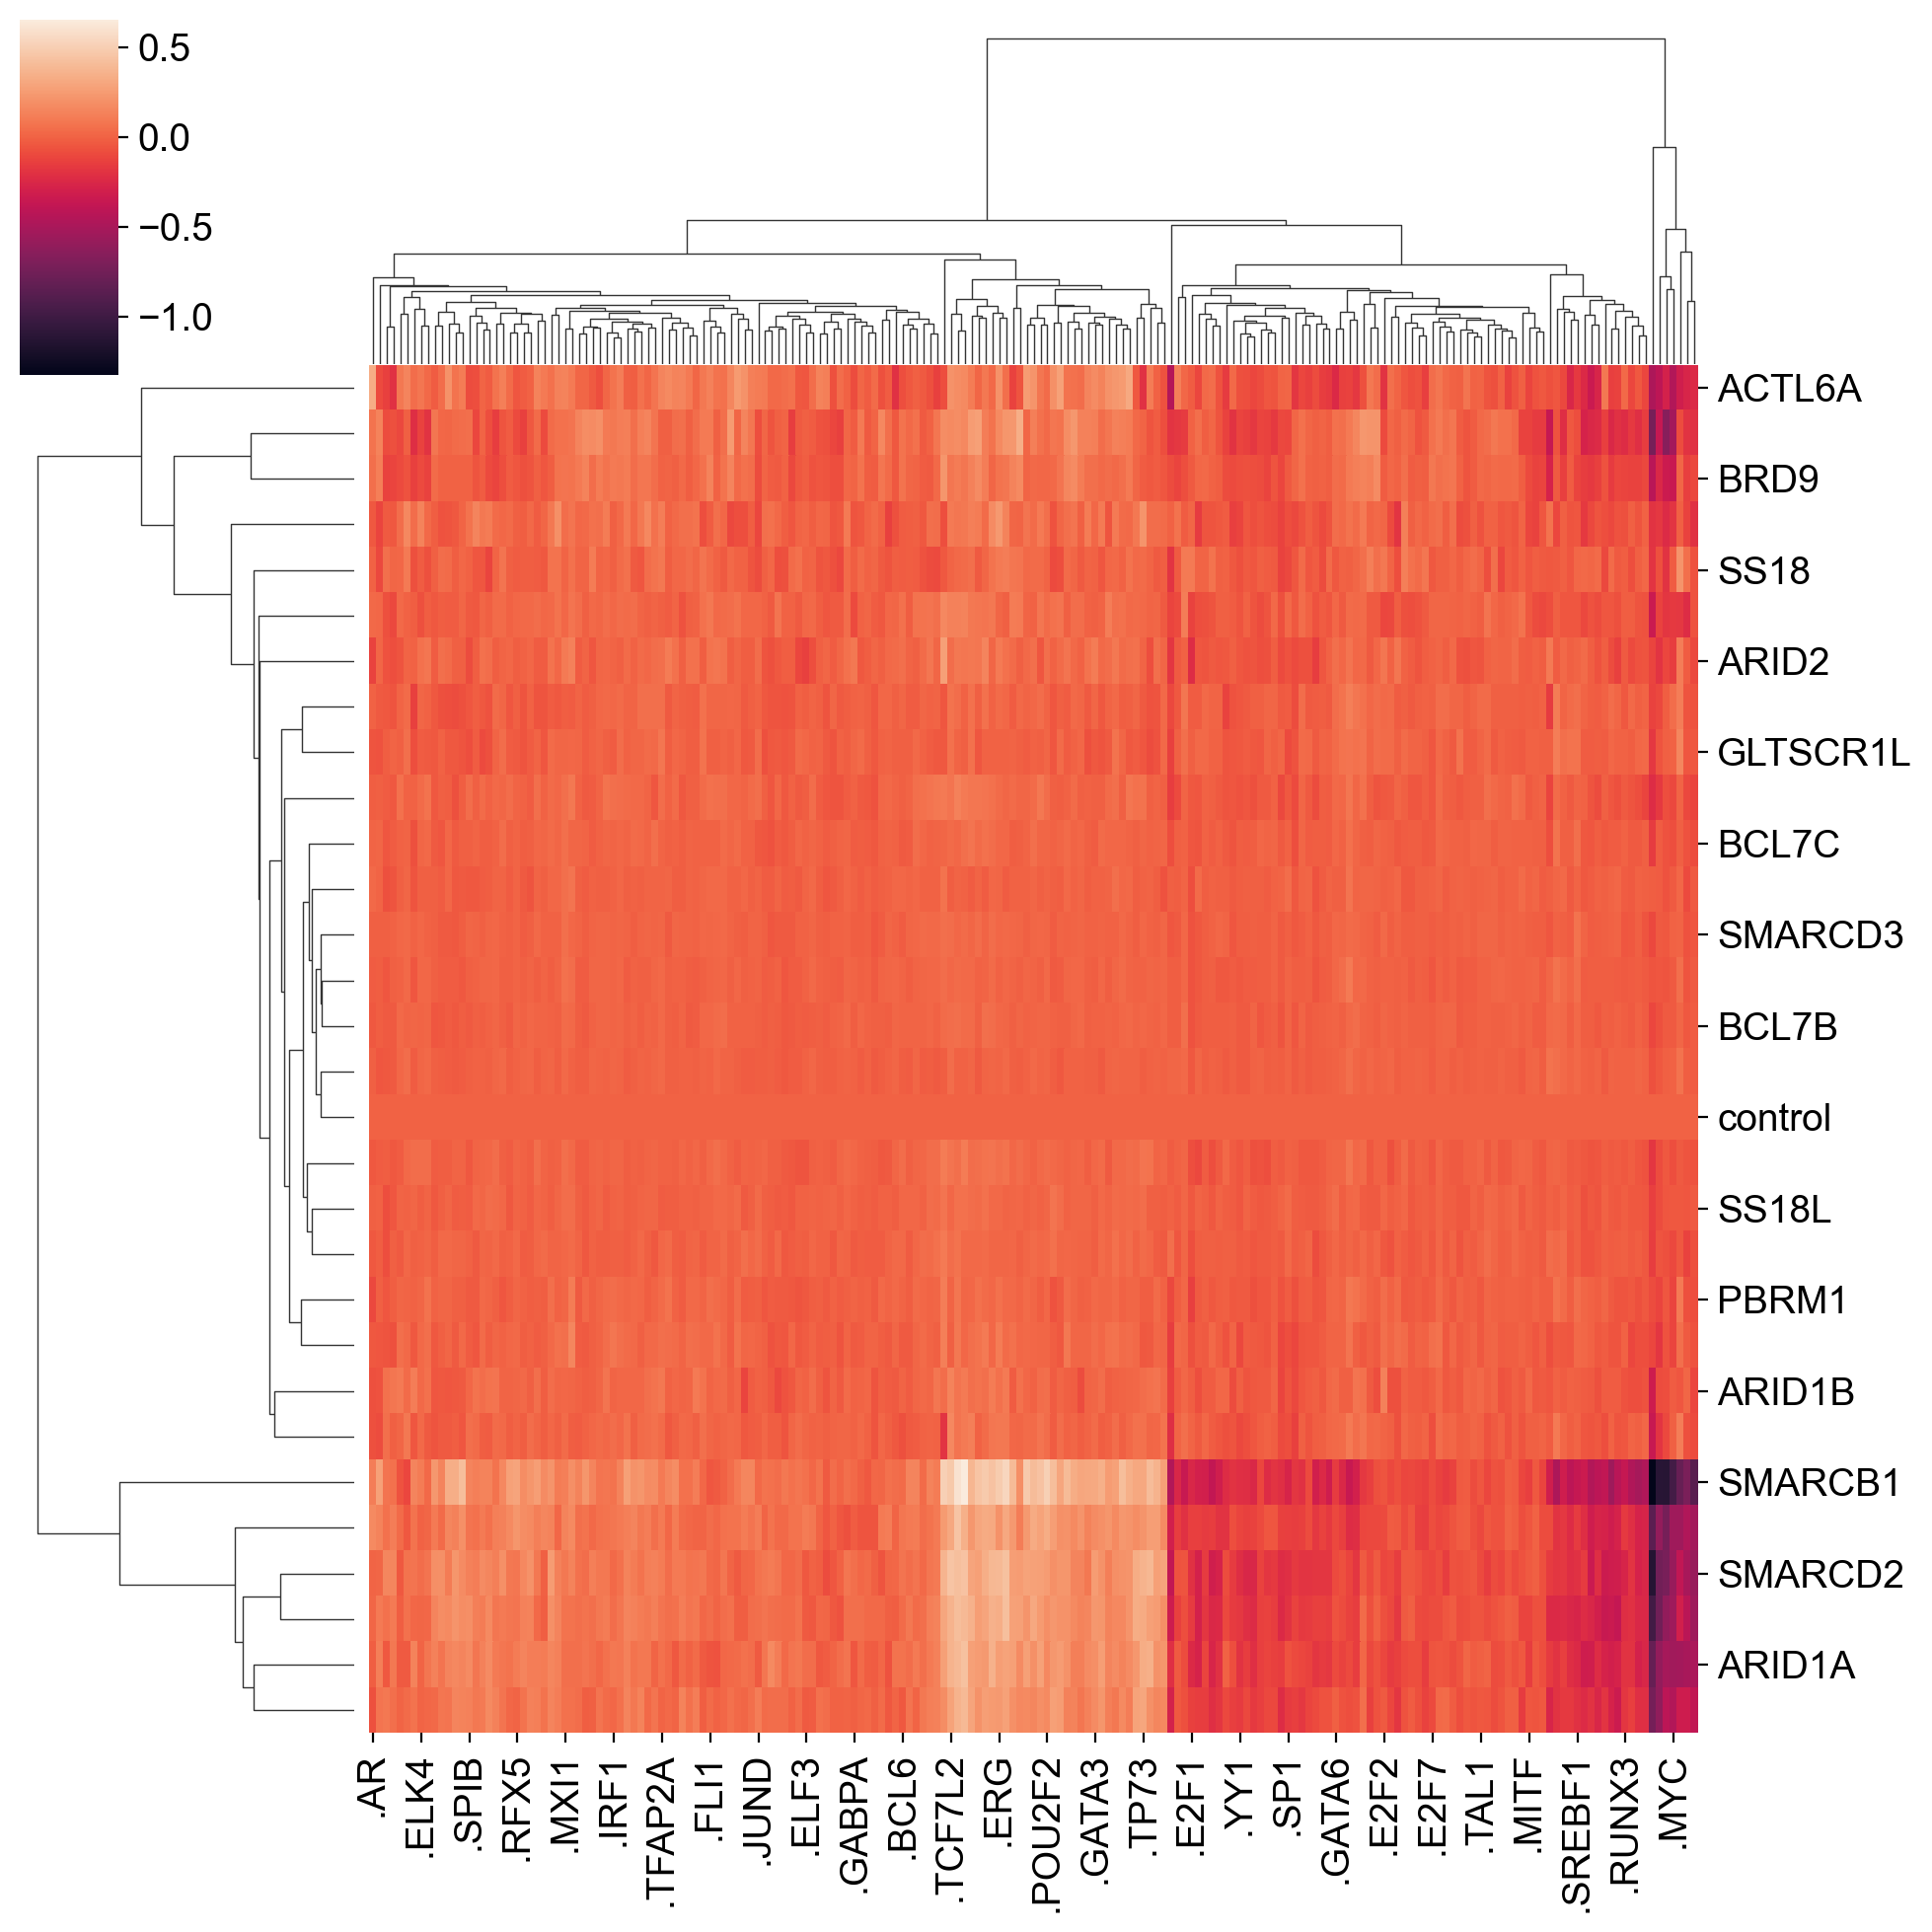

In [115]:
g=sns.clustermap(x[0])
sorted_tfs=x[0].columns[g.dendrogram_col.reordered_ind]
print(sorted_tfs)

In [4]:
sorted_tfs

NameError: name 'sorted_tfs' is not defined

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


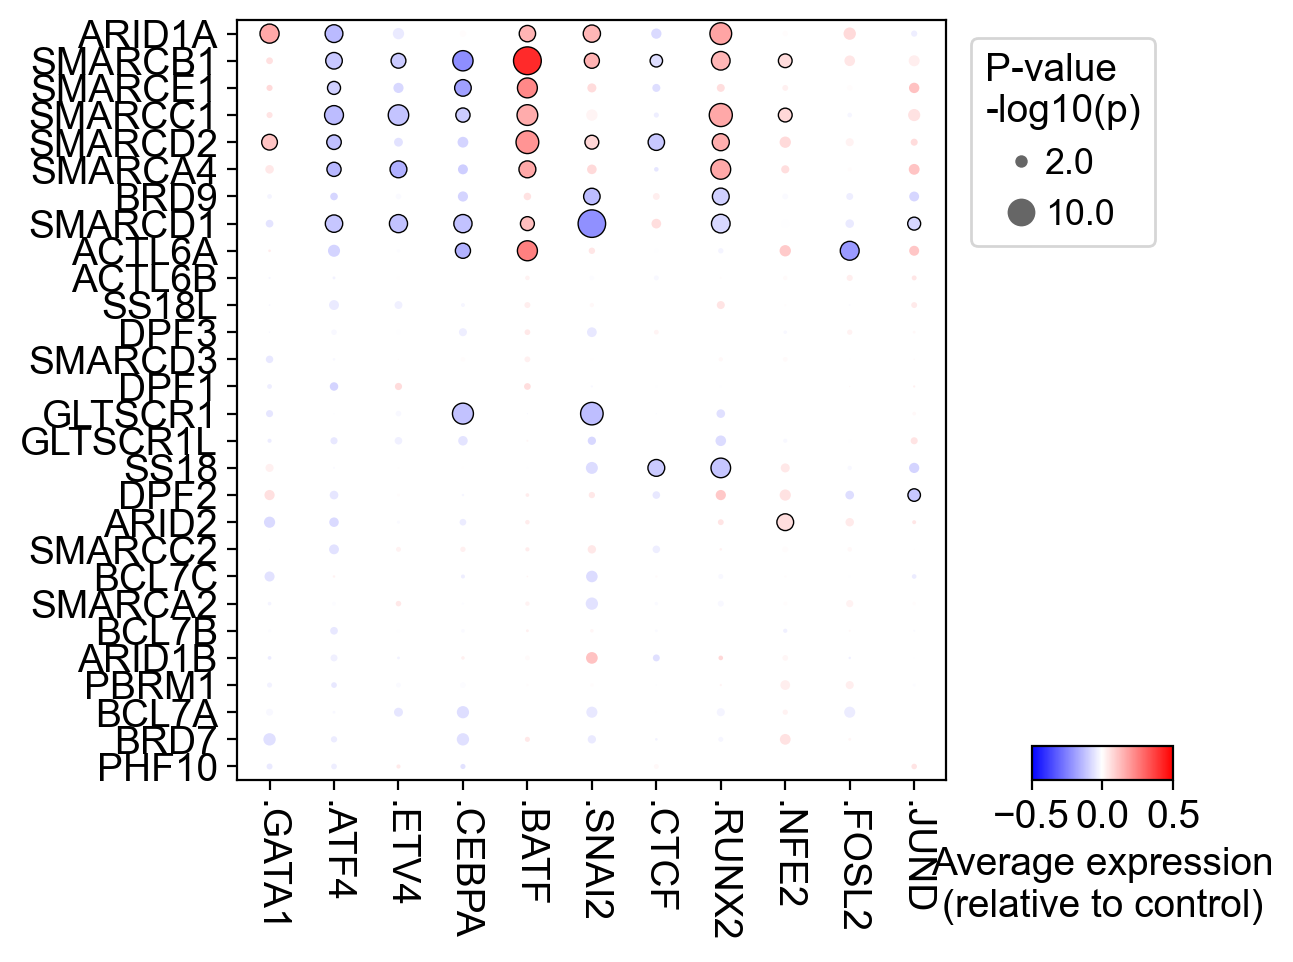

In [125]:
perturb.pl.dotplot2(x[0],x[1],['.'+tf for tf in keep],genes[::1],w=6,h=5,best_p=1e-10,
        title='Average expression\n(relative to control)')

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


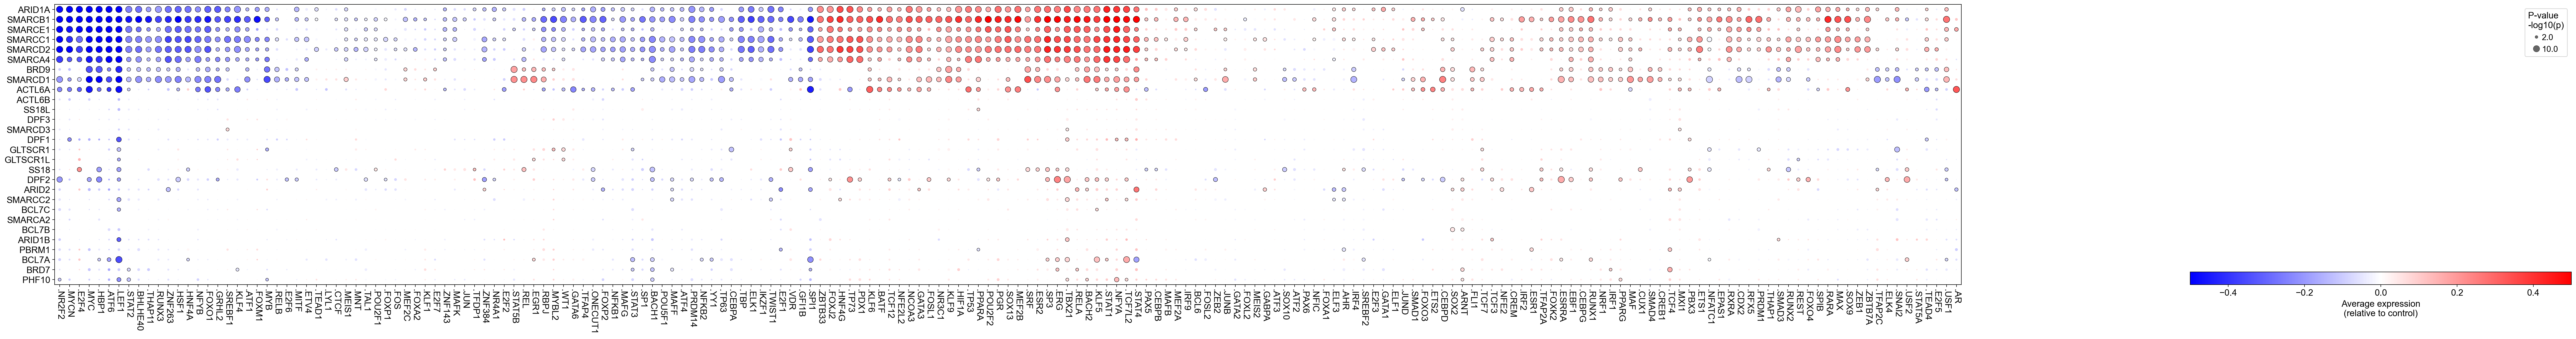

In [118]:
perturb.pl.dotplot2(x[0],x[1],sorted_tfs,genes[::1],w=70,h=8,best_p=1e-10,
        title='Average expression\n(relative to control)')

In [71]:
nattr

value
MITF   -0.141237
SNAI2   0.142769
YY1    -0.188374
CTCF   -0.073345
TCF7L2  0.365770
TRPS1   0.000000
RUNX2   0.176135
E2F1   -0.238597
ETV4   -0.039292
GATA1   0.170045
NFE2    0.004372
SPI1   -0.205966
ESR1    0.030575
GATA2  -0.022483
ETS1    0.157284
JUN    -0.076412
HNF4A  -0.273229
CEBPA   0.004062
MYC    -0.529535
MYB    -0.156337
FOXA1   0.047156
LEF1   -0.800392
FOS    -0.049859
AR     -0.012868
CEBPE   0.000000
ATF4   -0.134070
FLI1   -0.049456
NFKB1  -0.120387
USF1    0.125684
TCF7   -0.027966
JUND   -0.032158
EGR1    0.023114
PRDM14 -0.203915
FOSL2   0.073282
VDR    -0.084962
RUNX1   0.131191
RUNX3  -0.194114
BATF    0.144814
USF2   -0.027803
ESR2    0.271578
FOSB    0.000000
CUX1    0.055073
GATA3   0.195923
HIF1A   0.210711

In [ ]:
sns.clustermap(mean_acts.T, yticklabels=mean_acts.columns, vmin=-5, vmax=5, cmap='coolwarm',
               z_score=0,
              xticklabels=True)
plt.show()

In [ ]:
sns.clustermap(mean_acts.T, yticklabels=True, vmin=-5, vmax=5, cmap='coolwarm',
               z_score=0,figsize=(10,50),
              xticklabels=True)
plt.show()

In [ ]:
keep=['JUND','FOSL2','NFE2','RUNX2',
     'CTCF','SNAI2',
      'BATF','CEBPA','ETV4','ATF4','GATA1',
     
     
     
     ]
#keep=['CTCF','SNAI2']
others=list(set(mean_acts.index).difference(set(['control'])))
x=0.3

sns.clustermap((mean_acts.loc[others,keep]-mean_acts.loc['control',keep]).T, 
               vmin=-x,vmax=x,
               yticklabels=True, cmap='bwr',
               figsize=(15,5),
              xticklabels=True)
plt.show()

In [ ]:
acts

In [ ]:
ps=1e-20
a=plt.hist(-np.log10(np.array(acts.obsm['dorothea_mlm_pvals']).flatten()+ps),100)

In [ ]:
logFCs, pvals = dc.get_contrast(adata,
                                group_col='gene.compact',
                                condition_col='control',
                                condition='0',
                                reference='1',
                                method='t-test'
                               )
logFCs

In [ ]:
adata

In [126]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=300)



TypeError: 'fill_value=source' is not present in this Categorical's categories

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=adata.uns['coef.gene2'], net=progeny, 
                                         source='source', 
                                         target='target', 
                                         weight='weight')
pathway_acts

In [ ]:
sns.clustermap(pathway_acts, center=0, cmap='coolwarm')
plt.show()